# Linear Regression

$\textbf{1)}$Formula:$$y=a\textbf{x} + b$$
Cost function:$$J(a,b) = \frac{1}{2N}\sum_{i=0}^{N}(y_i-ax_i-b)^2$$

$\textbf{2)}$ Termination criterion is number of iteration, here I set 50000. 

In [1]:
import numpy as np
import matplotlib.pylab as pl
import random

def gradient(X, y, a, b):
    #y = aX + b
    #loss = 1/2N * sum((y - aX - b)^2)
    da, db = 0.0, 0.0
    N = len(X)
    db = np.sum(-1.0/N * (y - a*X - b))
    da = np.sum(-1.0/N * (y - a*X - b) * X)
    return da, db

def loss(X, y, a, b):
    N = len(X)
    loss = 0.5/N * np.sum((y - a*X - b)**2)
    return loss

def Huber(X, y, a, b, sigma):
    N = len(X)
    #residuals
    res = y - a*X - b
    res_abs = np.abs(res)
    idx_l = [res_abs<=sigma]
    idx_g = [res_abs>sigma]
    loss = 0.5*np.sum(res[idx_l]**2) + sigma * np.sum(res_abs[idx_g] - 0.5*sigma)
    loss /= N
    db = 1.0/N * (-np.sum(res[idx_l]) + sigma * (-np.sum(np.sign(res[idx_g]))))
    da = -np.sum(X[idx_l]*res[idx_l]) + sigma *(-np.sum(X[idx_g]))
    da /= N
    return loss, da, db

def opt(X, y, a, b, learning_rate, num_iter, browse = True):
#     a_update, b_update = 0.0, 0.0
    for i in range(num_iter):
        da, db = gradient(X, y, a, b)
        #update a, b
        a -= learning_rate * da
        b -= learning_rate * db
        if browse:
            print 'iter {0}:loss={1}'.format(i,loss(X, y, a, b))
    return a, b
def test(TEST_PATH, a, b):
    X_test, y_test = load_data(TEST_PATH)
    return loss(X_test, y_test, a, b)
def load_data(PATH):
    data =np.loadtxt(PATH, skiprows=1)
    X, y = data[:,0], data[:,1]
    X /=10.0
    y /=100.0
    return X, y

def linear_regression(PATH):
    #hyperparameter
    learning_rate = 0.001
    a_init = random.random()
    b_init = random.random()
    num_iter = 50000
    print a_init, b_init
    #load data
    X, y = load_data(PATH)
    
    #train
    print 'Train start...'
    a, b = opt(X, y, a_init, b_init, learning_rate, num_iter)
    print 'Result:\n a = {0}\n b = {1}\n loss = {2}\n'.format(a, b, loss(X, y, a, b))
    
    #plot
    y_p = a*X + b
    pl.plot(X, y, 'o')
    pl.plot(X, y_p, 'k-')
    pl.show()
    return a, b

0.614896642677 0.0804292033887
Train start...
iter 0:loss=2.55199294421
iter 1:loss=2.55008055629
iter 2:loss=2.54824314814
iter 3:loss=2.54647609061
iter 4:loss=2.54477504111
iter 5:loss=2.5431359259
iter 6:loss=2.54155492343
iter 7:loss=2.54002844873
iter 8:loss=2.53855313876
iter 9:loss=2.53712583866
iter 10:loss=2.5357435889
iter 11:loss=2.53440361315
iter 12:loss=2.53310330696
iter 13:loss=2.53184022709
iter 14:loss=2.53061208158
iter 15:loss=2.52941672033
iter 16:loss=2.52825212637
iter 17:loss=2.52711640757
iter 18:loss=2.52600778893
iter 19:loss=2.52492460537
iter 20:loss=2.52386529484
iter 21:loss=2.52282839201
iter 22:loss=2.52181252227
iter 23:loss=2.52081639608
iter 24:loss=2.51983880377
iter 25:loss=2.5188786105
iter 26:loss=2.51793475172
iter 27:loss=2.51700622878
iter 28:loss=2.51609210483
iter 29:loss=2.51519150101
iter 30:loss=2.51430359291
iter 31:loss=2.51342760709
iter 32:loss=2.51256281804
iter 33:loss=2.51170854513
iter 34:loss=2.51086414988
iter 35:loss=2.5100290

iter 837:loss=2.00913969195
iter 838:loss=2.00858770223
iter 839:loss=2.00803587341
iter 840:loss=2.00748420545
iter 841:loss=2.00693269831
iter 842:loss=2.00638135193
iter 843:loss=2.00583016628
iter 844:loss=2.00527914129
iter 845:loss=2.00472827694
iter 846:loss=2.00417757316
iter 847:loss=2.00362702992
iter 848:loss=2.00307664717
iter 849:loss=2.00252642485
iter 850:loss=2.00197636293
iter 851:loss=2.00142646135
iter 852:loss=2.00087672007
iter 853:loss=2.00032713905
iter 854:loss=1.99977771823
iter 855:loss=1.99922845757
iter 856:loss=1.99867935702
iter 857:loss=1.99813041654
iter 858:loss=1.99758163607
iter 859:loss=1.99703301558
iter 860:loss=1.99648455502
iter 861:loss=1.99593625433
iter 862:loss=1.99538811348
iter 863:loss=1.99484013241
iter 864:loss=1.99429231109
iter 865:loss=1.99374464945
iter 866:loss=1.99319714746
iter 867:loss=1.99264980508
iter 868:loss=1.99210262224
iter 869:loss=1.99155559891
iter 870:loss=1.99100873504
iter 871:loss=1.99046203059
iter 872:loss=1.9899

iter 2605:loss=1.24645702436
iter 2606:loss=1.24612736077
iter 2607:loss=1.24579779328
iter 2608:loss=1.24546832187
iter 2609:loss=1.24513894649
iter 2610:loss=1.24480966714
iter 2611:loss=1.24448048376
iter 2612:loss=1.24415139635
iter 2613:loss=1.24382240487
iter 2614:loss=1.24349350929
iter 2615:loss=1.24316470958
iter 2616:loss=1.24283600572
iter 2617:loss=1.24250739768
iter 2618:loss=1.24217888544
iter 2619:loss=1.24185046895
iter 2620:loss=1.2415221482
iter 2621:loss=1.24119392316
iter 2622:loss=1.24086579379
iter 2623:loss=1.24053776008
iter 2624:loss=1.24020982199
iter 2625:loss=1.2398819795
iter 2626:loss=1.23955423258
iter 2627:loss=1.23922658119
iter 2628:loss=1.23889902532
iter 2629:loss=1.23857156493
iter 2630:loss=1.2382442
iter 2631:loss=1.2379169305
iter 2632:loss=1.2375897564
iter 2633:loss=1.23726267767
iter 2634:loss=1.23693569428
iter 2635:loss=1.23660880622
iter 2636:loss=1.23628201344
iter 2637:loss=1.23595531593
iter 2638:loss=1.23562871364
iter 2639:loss=1.23530

iter 4590:loss=0.749555276385
iter 4591:loss=0.749370462358
iter 4592:loss=0.749185702205
iter 4593:loss=0.749000995911
iter 4594:loss=0.74881634346
iter 4595:loss=0.748631744836
iter 4596:loss=0.748447200023
iter 4597:loss=0.748262709006
iter 4598:loss=0.74807827177
iter 4599:loss=0.747893888298
iter 4600:loss=0.747709558574
iter 4601:loss=0.747525282584
iter 4602:loss=0.747341060311
iter 4603:loss=0.74715689174
iter 4604:loss=0.746972776855
iter 4605:loss=0.746788715641
iter 4606:loss=0.746604708081
iter 4607:loss=0.746420754161
iter 4608:loss=0.746236853864
iter 4609:loss=0.746053007175
iter 4610:loss=0.745869214079
iter 4611:loss=0.745685474559
iter 4612:loss=0.7455017886
iter 4613:loss=0.745318156187
iter 4614:loss=0.745134577303
iter 4615:loss=0.744951051934
iter 4616:loss=0.744767580063
iter 4617:loss=0.744584161676
iter 4618:loss=0.744400796756
iter 4619:loss=0.744217485288
iter 4620:loss=0.744034227256
iter 4621:loss=0.743851022644
iter 4622:loss=0.743667871438
iter 4623:loss=

iter 6586:loss=0.469847148559
iter 6587:loss=0.46974387097
iter 6588:loss=0.469640623488
iter 6589:loss=0.469537406103
iter 6590:loss=0.469434218806
iter 6591:loss=0.469331061589
iter 6592:loss=0.469227934443
iter 6593:loss=0.469124837359
iter 6594:loss=0.469021770328
iter 6595:loss=0.468918733342
iter 6596:loss=0.468815726392
iter 6597:loss=0.468712749468
iter 6598:loss=0.468609802564
iter 6599:loss=0.468506885668
iter 6600:loss=0.468403998774
iter 6601:loss=0.468301141872
iter 6602:loss=0.468198314953
iter 6603:loss=0.468095518008
iter 6604:loss=0.46799275103
iter 6605:loss=0.467890014008
iter 6606:loss=0.467787306935
iter 6607:loss=0.467684629802
iter 6608:loss=0.4675819826
iter 6609:loss=0.46747936532
iter 6610:loss=0.467376777953
iter 6611:loss=0.467274220491
iter 6612:loss=0.467171692925
iter 6613:loss=0.467069195247
iter 6614:loss=0.466966727447
iter 6615:loss=0.466864289517
iter 6616:loss=0.466761881448
iter 6617:loss=0.466659503232
iter 6618:loss=0.46655715486
iter 6619:loss=0

iter 8571:loss=0.314176894486
iter 8572:loss=0.314118995623
iter 8573:loss=0.314061113637
iter 8574:loss=0.314003248524
iter 8575:loss=0.313945400279
iter 8576:loss=0.313887568897
iter 8577:loss=0.313829754374
iter 8578:loss=0.313771956703
iter 8579:loss=0.313714175881
iter 8580:loss=0.313656411903
iter 8581:loss=0.313598664762
iter 8582:loss=0.313540934456
iter 8583:loss=0.313483220978
iter 8584:loss=0.313425524324
iter 8585:loss=0.313367844489
iter 8586:loss=0.313310181468
iter 8587:loss=0.313252535256
iter 8588:loss=0.313194905848
iter 8589:loss=0.313137293239
iter 8590:loss=0.313079697425
iter 8591:loss=0.3130221184
iter 8592:loss=0.31296455616
iter 8593:loss=0.3129070107
iter 8594:loss=0.312849482014
iter 8595:loss=0.312791970098
iter 8596:loss=0.312734474948
iter 8597:loss=0.312676996557
iter 8598:loss=0.312619534922
iter 8599:loss=0.312562090037
iter 8600:loss=0.312504661898
iter 8601:loss=0.312447250499
iter 8602:loss=0.312389855836
iter 8603:loss=0.312332477904
iter 8604:loss=

iter 10583:loss=0.226032890466
iter 10584:loss=0.226000686058
iter 10585:loss=0.225968491038
iter 10586:loss=0.225936305403
iter 10587:loss=0.225904129151
iter 10588:loss=0.225871962278
iter 10589:loss=0.225839804781
iter 10590:loss=0.225807656659
iter 10591:loss=0.225775517909
iter 10592:loss=0.225743388526
iter 10593:loss=0.22571126851
iter 10594:loss=0.225679157857
iter 10595:loss=0.225647056564
iter 10596:loss=0.22561496463
iter 10597:loss=0.22558288205
iter 10598:loss=0.225550808822
iter 10599:loss=0.225518744944
iter 10600:loss=0.225486690412
iter 10601:loss=0.225454645225
iter 10602:loss=0.225422609379
iter 10603:loss=0.225390582871
iter 10604:loss=0.2253585657
iter 10605:loss=0.225326557862
iter 10606:loss=0.225294559354
iter 10607:loss=0.225262570174
iter 10608:loss=0.225230590319
iter 10609:loss=0.225198619786
iter 10610:loss=0.225166658573
iter 10611:loss=0.225134706676
iter 10612:loss=0.225102764094
iter 10613:loss=0.225070830823
iter 10614:loss=0.225038906861
iter 10615:lo

iter 12580:loss=0.177274900029
iter 12581:loss=0.177256908841
iter 12582:loss=0.177238922897
iter 12583:loss=0.177220942196
iter 12584:loss=0.177202966736
iter 12585:loss=0.177184996516
iter 12586:loss=0.177167031535
iter 12587:loss=0.177149071791
iter 12588:loss=0.177131117282
iter 12589:loss=0.177113168007
iter 12590:loss=0.177095223964
iter 12591:loss=0.177077285152
iter 12592:loss=0.177059351569
iter 12593:loss=0.177041423214
iter 12594:loss=0.177023500086
iter 12595:loss=0.177005582181
iter 12596:loss=0.1769876695
iter 12597:loss=0.176969762041
iter 12598:loss=0.176951859802
iter 12599:loss=0.176933962781
iter 12600:loss=0.176916070978
iter 12601:loss=0.17689818439
iter 12602:loss=0.176880303016
iter 12603:loss=0.176862426855
iter 12604:loss=0.176844555904
iter 12605:loss=0.176826690163
iter 12606:loss=0.17680882963
iter 12607:loss=0.176790974304
iter 12608:loss=0.176773124182
iter 12609:loss=0.176755279264
iter 12610:loss=0.176737439548
iter 12611:loss=0.176719605032
iter 12612:l

iter 14575:loss=0.150056062136
iter 14576:loss=0.150046005386
iter 14577:loss=0.150035951569
iter 14578:loss=0.150025900681
iter 14579:loss=0.150015852724
iter 14580:loss=0.150005807696
iter 14581:loss=0.149995765596
iter 14582:loss=0.149985726423
iter 14583:loss=0.149975690177
iter 14584:loss=0.149965656857
iter 14585:loss=0.149955626461
iter 14586:loss=0.149945598989
iter 14587:loss=0.14993557444
iter 14588:loss=0.149925552813
iter 14589:loss=0.149915534108
iter 14590:loss=0.149905518323
iter 14591:loss=0.149895505458
iter 14592:loss=0.149885495512
iter 14593:loss=0.149875488483
iter 14594:loss=0.149865484372
iter 14595:loss=0.149855483177
iter 14596:loss=0.149845484898
iter 14597:loss=0.149835489533
iter 14598:loss=0.149825497081
iter 14599:loss=0.149815507543
iter 14600:loss=0.149805520916
iter 14601:loss=0.149795537201
iter 14602:loss=0.149785556396
iter 14603:loss=0.1497755785
iter 14604:loss=0.149765603513
iter 14605:loss=0.149755631434
iter 14606:loss=0.149745662262
iter 14607:

iter 16594:loss=0.134706757694
iter 16595:loss=0.134701175351
iter 16596:loss=0.134695594634
iter 16597:loss=0.134690015544
iter 16598:loss=0.134684438081
iter 16599:loss=0.134678862243
iter 16600:loss=0.134673288031
iter 16601:loss=0.134667715444
iter 16602:loss=0.134662144481
iter 16603:loss=0.134656575142
iter 16604:loss=0.134651007427
iter 16605:loss=0.134645441335
iter 16606:loss=0.134639876865
iter 16607:loss=0.134634314017
iter 16608:loss=0.134628752791
iter 16609:loss=0.134623193186
iter 16610:loss=0.134617635202
iter 16611:loss=0.134612078838
iter 16612:loss=0.134606524093
iter 16613:loss=0.134600970968
iter 16614:loss=0.134595419462
iter 16615:loss=0.134589869573
iter 16616:loss=0.134584321303
iter 16617:loss=0.13457877465
iter 16618:loss=0.134573229614
iter 16619:loss=0.134567686194
iter 16620:loss=0.134562144391
iter 16621:loss=0.134556604202
iter 16622:loss=0.134551065629
iter 16623:loss=0.13454552867
iter 16624:loss=0.134539993326
iter 16625:loss=0.134534459595
iter 16626

iter 18579:loss=0.126292493798
iter 18580:loss=0.126289364258
iter 18581:loss=0.12628623563
iter 18582:loss=0.126283107914
iter 18583:loss=0.12627998111
iter 18584:loss=0.126276855217
iter 18585:loss=0.126273730235
iter 18586:loss=0.126270606165
iter 18587:loss=0.126267483005
iter 18588:loss=0.126264360756
iter 18589:loss=0.126261239416
iter 18590:loss=0.126258118987
iter 18591:loss=0.126254999467
iter 18592:loss=0.126251880857
iter 18593:loss=0.126248763156
iter 18594:loss=0.126245646363
iter 18595:loss=0.126242530479
iter 18596:loss=0.126239415504
iter 18597:loss=0.126236301436
iter 18598:loss=0.126233188276
iter 18599:loss=0.126230076024
iter 18600:loss=0.126226964679
iter 18601:loss=0.126223854241
iter 18602:loss=0.126220744709
iter 18603:loss=0.126217636084
iter 18604:loss=0.126214528366
iter 18605:loss=0.126211421553
iter 18606:loss=0.126208315645
iter 18607:loss=0.126205210644
iter 18608:loss=0.126202106547
iter 18609:loss=0.126199003355
iter 18610:loss=0.126195901068
iter 18611

iter 20587:loss=0.121535115972
iter 20588:loss=0.121533373233
iter 20589:loss=0.121531631003
iter 20590:loss=0.12152988928
iter 20591:loss=0.121528148065
iter 20592:loss=0.121526407357
iter 20593:loss=0.121524667157
iter 20594:loss=0.121522927464
iter 20595:loss=0.121521188279
iter 20596:loss=0.1215194496
iter 20597:loss=0.121517711428
iter 20598:loss=0.121515973763
iter 20599:loss=0.121514236604
iter 20600:loss=0.121512499952
iter 20601:loss=0.121510763806
iter 20602:loss=0.121509028166
iter 20603:loss=0.121507293032
iter 20604:loss=0.121505558404
iter 20605:loss=0.121503824281
iter 20606:loss=0.121502090664
iter 20607:loss=0.121500357553
iter 20608:loss=0.121498624946
iter 20609:loss=0.121496892845
iter 20610:loss=0.121495161248
iter 20611:loss=0.121493430157
iter 20612:loss=0.121491699569
iter 20613:loss=0.121489969487
iter 20614:loss=0.121488239909
iter 20615:loss=0.121486510834
iter 20616:loss=0.121484782264
iter 20617:loss=0.121483054198
iter 20618:loss=0.121481326636
iter 20619:

iter 22585:loss=0.118895607967
iter 22586:loss=0.118894634659
iter 22587:loss=0.118893661635
iter 22588:loss=0.118892688895
iter 22589:loss=0.118891716438
iter 22590:loss=0.118890744264
iter 22591:loss=0.118889772374
iter 22592:loss=0.118888800768
iter 22593:loss=0.118887829444
iter 22594:loss=0.118886858404
iter 22595:loss=0.118885887647
iter 22596:loss=0.118884917172
iter 22597:loss=0.118883946981
iter 22598:loss=0.118882977073
iter 22599:loss=0.118882007447
iter 22600:loss=0.118881038104
iter 22601:loss=0.118880069043
iter 22602:loss=0.118879100265
iter 22603:loss=0.118878131769
iter 22604:loss=0.118877163556
iter 22605:loss=0.118876195625
iter 22606:loss=0.118875227976
iter 22607:loss=0.118874260609
iter 22608:loss=0.118873293524
iter 22609:loss=0.118872326721
iter 22610:loss=0.118871360199
iter 22611:loss=0.11887039396
iter 22612:loss=0.118869428002
iter 22613:loss=0.118868462326
iter 22614:loss=0.118867496931
iter 22615:loss=0.118866531818
iter 22616:loss=0.118865566986
iter 2261

iter 24585:loss=0.11742037357
iter 24586:loss=0.117419830301
iter 24587:loss=0.117419287191
iter 24588:loss=0.117418744239
iter 24589:loss=0.117418201445
iter 24590:loss=0.117417658809
iter 24591:loss=0.117417116331
iter 24592:loss=0.117416574012
iter 24593:loss=0.11741603185
iter 24594:loss=0.117415489847
iter 24595:loss=0.117414948002
iter 24596:loss=0.117414406314
iter 24597:loss=0.117413864785
iter 24598:loss=0.117413323413
iter 24599:loss=0.117412782199
iter 24600:loss=0.117412241143
iter 24601:loss=0.117411700245
iter 24602:loss=0.117411159504
iter 24603:loss=0.117410618921
iter 24604:loss=0.117410078496
iter 24605:loss=0.117409538228
iter 24606:loss=0.117408998118
iter 24607:loss=0.117408458165
iter 24608:loss=0.117407918369
iter 24609:loss=0.117407378731
iter 24610:loss=0.11740683925
iter 24611:loss=0.117406299927
iter 24612:loss=0.11740576076
iter 24613:loss=0.117405221751
iter 24614:loss=0.117404682899
iter 24615:loss=0.117404144204
iter 24616:loss=0.117403605666
iter 24617:l

iter 26589:loss=0.116595732996
iter 26590:loss=0.116595430115
iter 26591:loss=0.116595127321
iter 26592:loss=0.116594824616
iter 26593:loss=0.116594521999
iter 26594:loss=0.11659421947
iter 26595:loss=0.11659391703
iter 26596:loss=0.116593614677
iter 26597:loss=0.116593312413
iter 26598:loss=0.116593010237
iter 26599:loss=0.116592708149
iter 26600:loss=0.116592406149
iter 26601:loss=0.116592104237
iter 26602:loss=0.116591802413
iter 26603:loss=0.116591500677
iter 26604:loss=0.116591199029
iter 26605:loss=0.116590897469
iter 26606:loss=0.116590595997
iter 26607:loss=0.116590294612
iter 26608:loss=0.116589993316
iter 26609:loss=0.116589692107
iter 26610:loss=0.116589390987
iter 26611:loss=0.116589089954
iter 26612:loss=0.116588789008
iter 26613:loss=0.116588488151
iter 26614:loss=0.116588187381
iter 26615:loss=0.116587886699
iter 26616:loss=0.116587586104
iter 26617:loss=0.116587285597
iter 26618:loss=0.116586985178
iter 26619:loss=0.116586684846
iter 26620:loss=0.116586384602
iter 26621

iter 28569:loss=0.116140049237
iter 28570:loss=0.116139879189
iter 28571:loss=0.116139709191
iter 28572:loss=0.116139539243
iter 28573:loss=0.116139369344
iter 28574:loss=0.116139199495
iter 28575:loss=0.116139029695
iter 28576:loss=0.116138859945
iter 28577:loss=0.116138690244
iter 28578:loss=0.116138520593
iter 28579:loss=0.116138350991
iter 28580:loss=0.116138181438
iter 28581:loss=0.116138011935
iter 28582:loss=0.116137842482
iter 28583:loss=0.116137673078
iter 28584:loss=0.116137503723
iter 28585:loss=0.116137334417
iter 28586:loss=0.116137165161
iter 28587:loss=0.116136995955
iter 28588:loss=0.116136826797
iter 28589:loss=0.116136657689
iter 28590:loss=0.11613648863
iter 28591:loss=0.116136319621
iter 28592:loss=0.116136150661
iter 28593:loss=0.11613598175
iter 28594:loss=0.116135812888
iter 28595:loss=0.116135644075
iter 28596:loss=0.116135475312
iter 28597:loss=0.116135306598
iter 28598:loss=0.116135137933
iter 28599:loss=0.116134969317
iter 28600:loss=0.11613480075
iter 28601:

iter 30581:loss=0.115881172586
iter 30582:loss=0.115881078002
iter 30583:loss=0.115880983446
iter 30584:loss=0.115880888918
iter 30585:loss=0.115880794417
iter 30586:loss=0.115880699944
iter 30587:loss=0.115880605498
iter 30588:loss=0.11588051108
iter 30589:loss=0.115880416689
iter 30590:loss=0.115880322326
iter 30591:loss=0.11588022799
iter 30592:loss=0.115880133682
iter 30593:loss=0.115880039401
iter 30594:loss=0.115879945148
iter 30595:loss=0.115879850923
iter 30596:loss=0.115879756724
iter 30597:loss=0.115879662554
iter 30598:loss=0.11587956841
iter 30599:loss=0.115879474294
iter 30600:loss=0.115879380206
iter 30601:loss=0.115879286145
iter 30602:loss=0.115879192111
iter 30603:loss=0.115879098105
iter 30604:loss=0.115879004126
iter 30605:loss=0.115878910175
iter 30606:loss=0.115878816251
iter 30607:loss=0.115878722354
iter 30608:loss=0.115878628485
iter 30609:loss=0.115878534643
iter 30610:loss=0.115878440829
iter 30611:loss=0.115878347041
iter 30612:loss=0.115878253282
iter 30613:

iter 32567:loss=0.115738553888
iter 32568:loss=0.115738500878
iter 32569:loss=0.115738447885
iter 32570:loss=0.115738394906
iter 32571:loss=0.115738341943
iter 32572:loss=0.115738288995
iter 32573:loss=0.115738236063
iter 32574:loss=0.115738183147
iter 32575:loss=0.115738130245
iter 32576:loss=0.115738077359
iter 32577:loss=0.115738024489
iter 32578:loss=0.115737971634
iter 32579:loss=0.115737918794
iter 32580:loss=0.11573786597
iter 32581:loss=0.115737813161
iter 32582:loss=0.115737760368
iter 32583:loss=0.11573770759
iter 32584:loss=0.115737654827
iter 32585:loss=0.11573760208
iter 32586:loss=0.115737549348
iter 32587:loss=0.115737496631
iter 32588:loss=0.11573744393
iter 32589:loss=0.115737391244
iter 32590:loss=0.115737338574
iter 32591:loss=0.115737285918
iter 32592:loss=0.115737233279
iter 32593:loss=0.115737180654
iter 32594:loss=0.115737128045
iter 32595:loss=0.115737075451
iter 32596:loss=0.115737022873
iter 32597:loss=0.11573697031
iter 32598:loss=0.115736917762
iter 32599:lo

iter 34564:loss=0.115658296829
iter 34565:loss=0.115658267215
iter 34566:loss=0.11565823761
iter 34567:loss=0.115658208013
iter 34568:loss=0.115658178425
iter 34569:loss=0.115658148845
iter 34570:loss=0.115658119275
iter 34571:loss=0.115658089712
iter 34572:loss=0.115658060159
iter 34573:loss=0.115658030614
iter 34574:loss=0.115658001077
iter 34575:loss=0.115657971549
iter 34576:loss=0.11565794203
iter 34577:loss=0.11565791252
iter 34578:loss=0.115657883018
iter 34579:loss=0.115657853524
iter 34580:loss=0.11565782404
iter 34581:loss=0.115657794563
iter 34582:loss=0.115657765096
iter 34583:loss=0.115657735637
iter 34584:loss=0.115657706186
iter 34585:loss=0.115657676744
iter 34586:loss=0.115657647311
iter 34587:loss=0.115657617887
iter 34588:loss=0.11565758847
iter 34589:loss=0.115657559063
iter 34590:loss=0.115657529664
iter 34591:loss=0.115657500274
iter 34592:loss=0.115657470892
iter 34593:loss=0.115657441519
iter 34594:loss=0.115657412154
iter 34595:loss=0.115657382798
iter 34596:lo

iter 36576:loss=0.115613213079
iter 36577:loss=0.115613196608
iter 36578:loss=0.115613180141
iter 36579:loss=0.115613163678
iter 36580:loss=0.115613147221
iter 36581:loss=0.115613130768
iter 36582:loss=0.11561311432
iter 36583:loss=0.115613097877
iter 36584:loss=0.115613081439
iter 36585:loss=0.115613065005
iter 36586:loss=0.115613048577
iter 36587:loss=0.115613032153
iter 36588:loss=0.115613015734
iter 36589:loss=0.115612999319
iter 36590:loss=0.11561298291
iter 36591:loss=0.115612966505
iter 36592:loss=0.115612950105
iter 36593:loss=0.11561293371
iter 36594:loss=0.11561291732
iter 36595:loss=0.115612900934
iter 36596:loss=0.115612884553
iter 36597:loss=0.115612868177
iter 36598:loss=0.115612851806
iter 36599:loss=0.115612835439
iter 36600:loss=0.115612819077
iter 36601:loss=0.11561280272
iter 36602:loss=0.115612786368
iter 36603:loss=0.115612770021
iter 36604:loss=0.115612753678
iter 36605:loss=0.11561273734
iter 36606:loss=0.115612721007
iter 36607:loss=0.115612704678
iter 36608:los

iter 38589:loss=0.115588127511
iter 38590:loss=0.115588118351
iter 38591:loss=0.115588109195
iter 38592:loss=0.115588100041
iter 38593:loss=0.11558809089
iter 38594:loss=0.115588081741
iter 38595:loss=0.115588072595
iter 38596:loss=0.115588063452
iter 38597:loss=0.115588054311
iter 38598:loss=0.115588045173
iter 38599:loss=0.115588036038
iter 38600:loss=0.115588026905
iter 38601:loss=0.115588017775
iter 38602:loss=0.115588008648
iter 38603:loss=0.115587999523
iter 38604:loss=0.115587990402
iter 38605:loss=0.115587981282
iter 38606:loss=0.115587972166
iter 38607:loss=0.115587963052
iter 38608:loss=0.11558795394
iter 38609:loss=0.115587944832
iter 38610:loss=0.115587935726
iter 38611:loss=0.115587926622
iter 38612:loss=0.115587917521
iter 38613:loss=0.115587908423
iter 38614:loss=0.115587899328
iter 38615:loss=0.115587890235
iter 38616:loss=0.115587881145
iter 38617:loss=0.115587872058
iter 38618:loss=0.115587862973
iter 38619:loss=0.115587853891
iter 38620:loss=0.115587844811
iter 38621

iter 40583:loss=0.115574275577
iter 40584:loss=0.115574270455
iter 40585:loss=0.115574265335
iter 40586:loss=0.115574260217
iter 40587:loss=0.1155742551
iter 40588:loss=0.115574249985
iter 40589:loss=0.115574244871
iter 40590:loss=0.115574239758
iter 40591:loss=0.115574234648
iter 40592:loss=0.115574229538
iter 40593:loss=0.11557422443
iter 40594:loss=0.115574219324
iter 40595:loss=0.115574214219
iter 40596:loss=0.115574209115
iter 40597:loss=0.115574204013
iter 40598:loss=0.115574198913
iter 40599:loss=0.115574193814
iter 40600:loss=0.115574188716
iter 40601:loss=0.11557418362
iter 40602:loss=0.115574178526
iter 40603:loss=0.115574173433
iter 40604:loss=0.115574168341
iter 40605:loss=0.115574163251
iter 40606:loss=0.115574158162
iter 40607:loss=0.115574153075
iter 40608:loss=0.115574147989
iter 40609:loss=0.115574142905
iter 40610:loss=0.115574137823
iter 40611:loss=0.115574132741
iter 40612:loss=0.115574127662
iter 40613:loss=0.115574122583
iter 40614:loss=0.115574117507
iter 40615:l

iter 42590:loss=0.115566493176
iter 42591:loss=0.115566490324
iter 42592:loss=0.115566487472
iter 42593:loss=0.115566484621
iter 42594:loss=0.11556648177
iter 42595:loss=0.115566478921
iter 42596:loss=0.115566476072
iter 42597:loss=0.115566473225
iter 42598:loss=0.115566470378
iter 42599:loss=0.115566467532
iter 42600:loss=0.115566464686
iter 42601:loss=0.115566461842
iter 42602:loss=0.115566458998
iter 42603:loss=0.115566456155
iter 42604:loss=0.115566453313
iter 42605:loss=0.115566450472
iter 42606:loss=0.115566447632
iter 42607:loss=0.115566444793
iter 42608:loss=0.115566441954
iter 42609:loss=0.115566439116
iter 42610:loss=0.115566436279
iter 42611:loss=0.115566433443
iter 42612:loss=0.115566430608
iter 42613:loss=0.115566427773
iter 42614:loss=0.115566424939
iter 42615:loss=0.115566422107
iter 42616:loss=0.115566419274
iter 42617:loss=0.115566416443
iter 42618:loss=0.115566413613
iter 42619:loss=0.115566410783
iter 42620:loss=0.115566407955
iter 42621:loss=0.115566405127
iter 4262

iter 44458:loss=0.115562383598
iter 44459:loss=0.115562381943
iter 44460:loss=0.115562380289
iter 44461:loss=0.115562378635
iter 44462:loss=0.115562376982
iter 44463:loss=0.115562375329
iter 44464:loss=0.115562373677
iter 44465:loss=0.115562372025
iter 44466:loss=0.115562370373
iter 44467:loss=0.115562368722
iter 44468:loss=0.115562367072
iter 44469:loss=0.115562365422
iter 44470:loss=0.115562363772
iter 44471:loss=0.115562362123
iter 44472:loss=0.115562360475
iter 44473:loss=0.115562358827
iter 44474:loss=0.115562357179
iter 44475:loss=0.115562355532
iter 44476:loss=0.115562353886
iter 44477:loss=0.11556235224
iter 44478:loss=0.115562350594
iter 44479:loss=0.115562348949
iter 44480:loss=0.115562347304
iter 44481:loss=0.11556234566
iter 44482:loss=0.115562344016
iter 44483:loss=0.115562342373
iter 44484:loss=0.11556234073
iter 44485:loss=0.115562339088
iter 44486:loss=0.115562337446
iter 44487:loss=0.115562335805
iter 44488:loss=0.115562334164
iter 44489:loss=0.115562332523
iter 44490:

iter 46096:loss=0.115560228145
iter 46097:loss=0.115560227118
iter 46098:loss=0.115560226092
iter 46099:loss=0.115560225066
iter 46100:loss=0.115560224041
iter 46101:loss=0.115560223016
iter 46102:loss=0.115560221991
iter 46103:loss=0.115560220966
iter 46104:loss=0.115560219942
iter 46105:loss=0.115560218918
iter 46106:loss=0.115560217894
iter 46107:loss=0.11556021687
iter 46108:loss=0.115560215847
iter 46109:loss=0.115560214824
iter 46110:loss=0.115560213802
iter 46111:loss=0.115560212779
iter 46112:loss=0.115560211757
iter 46113:loss=0.115560210736
iter 46114:loss=0.115560209714
iter 46115:loss=0.115560208693
iter 46116:loss=0.115560207672
iter 46117:loss=0.115560206652
iter 46118:loss=0.115560205632
iter 46119:loss=0.115560204612
iter 46120:loss=0.115560203592
iter 46121:loss=0.115560202573
iter 46122:loss=0.115560201554
iter 46123:loss=0.115560200535
iter 46124:loss=0.115560199517
iter 46125:loss=0.115560198499
iter 46126:loss=0.115560197481
iter 46127:loss=0.115560196463
iter 4612

iter 48081:loss=0.115558680961
iter 48082:loss=0.115558680385
iter 48083:loss=0.11555867981
iter 48084:loss=0.115558679235
iter 48085:loss=0.11555867866
iter 48086:loss=0.115558678085
iter 48087:loss=0.11555867751
iter 48088:loss=0.115558676936
iter 48089:loss=0.115558676362
iter 48090:loss=0.115558675788
iter 48091:loss=0.115558675214
iter 48092:loss=0.11555867464
iter 48093:loss=0.115558674066
iter 48094:loss=0.115558673493
iter 48095:loss=0.11555867292
iter 48096:loss=0.115558672347
iter 48097:loss=0.115558671774
iter 48098:loss=0.115558671201
iter 48099:loss=0.115558670628
iter 48100:loss=0.115558670056
iter 48101:loss=0.115558669484
iter 48102:loss=0.115558668911
iter 48103:loss=0.115558668339
iter 48104:loss=0.115558667768
iter 48105:loss=0.115558667196
iter 48106:loss=0.115558666625
iter 48107:loss=0.115558666053
iter 48108:loss=0.115558665482
iter 48109:loss=0.115558664911
iter 48110:loss=0.115558664341
iter 48111:loss=0.11555866377
iter 48112:loss=0.1155586632
iter 48113:loss=

iter 49529:loss=0.115558001151
iter 49530:loss=0.115558000774
iter 49531:loss=0.115558000397
iter 49532:loss=0.115558000019
iter 49533:loss=0.115557999643
iter 49534:loss=0.115557999266
iter 49535:loss=0.115557998889
iter 49536:loss=0.115557998512
iter 49537:loss=0.115557998136
iter 49538:loss=0.115557997759
iter 49539:loss=0.115557997383
iter 49540:loss=0.115557997007
iter 49541:loss=0.115557996631
iter 49542:loss=0.115557996255
iter 49543:loss=0.115557995879
iter 49544:loss=0.115557995503
iter 49545:loss=0.115557995128
iter 49546:loss=0.115557994752
iter 49547:loss=0.115557994377
iter 49548:loss=0.115557994001
iter 49549:loss=0.115557993626
iter 49550:loss=0.115557993251
iter 49551:loss=0.115557992876
iter 49552:loss=0.115557992501
iter 49553:loss=0.115557992127
iter 49554:loss=0.115557991752
iter 49555:loss=0.115557991377
iter 49556:loss=0.115557991003
iter 49557:loss=0.115557990629
iter 49558:loss=0.115557990254
iter 49559:loss=0.11555798988
iter 49560:loss=0.115557989506
iter 4956

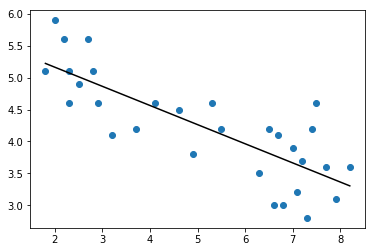

In [2]:
if __name__ == '__main__':
    #data path
    PATH = '4-data.txt'
    
    linear_regression(PATH)

# Promble 4

0.116204285146 0.955562507841
Train start...
iter 0:loss=7.67181048809
iter 1:loss=7.17462022653
iter 2:loss=6.73776748007
iter 3:loss=6.35390104722
iter 4:loss=6.01656537455
iter 5:loss=5.72009143373
iter 6:loss=5.45950089362
iter 7:loss=5.23042196782
iter 8:loss=5.02901551512
iter 9:loss=4.85191014361
iter 10:loss=4.69614522148
iter 11:loss=4.5591208313
iter 12:loss=4.43855382165
iter 13:loss=4.33243921329
iter 14:loss=4.23901630752
iter 15:loss=4.15673892377
iter 16:loss=4.08424926338
iter 17:loss=4.02035495767
iter 18:loss=3.96400891249
iter 19:loss=3.91429160842
iter 20:loss=3.87039555739
iter 21:loss=3.83161165318
iter 22:loss=3.79731718487
iter 23:loss=3.76696531063
iter 24:loss=3.74007581414
iter 25:loss=3.71622698711
iter 26:loss=3.69504850081
iter 27:loss=3.67621514619
iter 28:loss=3.65944133659
iter 29:loss=3.64447628029
iter 30:loss=3.63109974121
iter 31:loss=3.61911831607
iter 32:loss=3.60836216519
iter 33:loss=3.59868214157
iter 34:loss=3.58994726974
iter 35:loss=3.582042

iter 455:loss=2.82040363484
iter 456:loss=2.81889416054
iter 457:loss=2.81738556622
iter 458:loss=2.81587785135
iter 459:loss=2.81437101544
iter 460:loss=2.81286505797
iter 461:loss=2.81135997842
iter 462:loss=2.80985577628
iter 463:loss=2.80835245105
iter 464:loss=2.80685000221
iter 465:loss=2.80534842924
iter 466:loss=2.80384773165
iter 467:loss=2.80234790892
iter 468:loss=2.80084896054
iter 469:loss=2.79935088599
iter 470:loss=2.79785368478
iter 471:loss=2.79635735638
iter 472:loss=2.7948619003
iter 473:loss=2.79336731602
iter 474:loss=2.79187360304
iter 475:loss=2.79038076085
iter 476:loss=2.78888878893
iter 477:loss=2.78739768679
iter 478:loss=2.78590745391
iter 479:loss=2.78441808979
iter 480:loss=2.78292959393
iter 481:loss=2.78144196581
iter 482:loss=2.77995520492
iter 483:loss=2.77846931078
iter 484:loss=2.77698428286
iter 485:loss=2.77550012067
iter 486:loss=2.7740168237
iter 487:loss=2.77253439144
iter 488:loss=2.77105282339
iter 489:loss=2.76957211906
iter 490:loss=2.768092

iter 2377:loss=1.0752777089
iter 2378:loss=1.07478558781
iter 2379:loss=1.07429375362
iter 2380:loss=1.07380220615
iter 2381:loss=1.07331094524
iter 2382:loss=1.07281997072
iter 2383:loss=1.07232928242
iter 2384:loss=1.07183888017
iter 2385:loss=1.07134876382
iter 2386:loss=1.07085893319
iter 2387:loss=1.07036938811
iter 2388:loss=1.06988012842
iter 2389:loss=1.06939115396
iter 2390:loss=1.06890246455
iter 2391:loss=1.06841406003
iter 2392:loss=1.06792594024
iter 2393:loss=1.067438105
iter 2394:loss=1.06695055416
iter 2395:loss=1.06646328754
iter 2396:loss=1.06597630499
iter 2397:loss=1.06548960633
iter 2398:loss=1.0650031914
iter 2399:loss=1.06451706003
iter 2400:loss=1.06403121207
iter 2401:loss=1.06354564734
iter 2402:loss=1.06306036567
iter 2403:loss=1.06257536692
iter 2404:loss=1.0620906509
iter 2405:loss=1.06160621745
iter 2406:loss=1.06112206641
iter 2407:loss=1.06063819762
iter 2408:loss=1.06015461091
iter 2409:loss=1.05967130611
iter 2410:loss=1.05918828307
iter 2411:loss=1.05

iter 4219:loss=0.519472426014
iter 4220:loss=0.51930432183
iter 4221:loss=0.519136315646
iter 4222:loss=0.518968407405
iter 4223:loss=0.518800597048
iter 4224:loss=0.51863288452
iter 4225:loss=0.518465269762
iter 4226:loss=0.518297752719
iter 4227:loss=0.518130333333
iter 4228:loss=0.517963011547
iter 4229:loss=0.517795787304
iter 4230:loss=0.517628660548
iter 4231:loss=0.517461631222
iter 4232:loss=0.517294699268
iter 4233:loss=0.51712786463
iter 4234:loss=0.516961127252
iter 4235:loss=0.516794487076
iter 4236:loss=0.516627944046
iter 4237:loss=0.516461498106
iter 4238:loss=0.516295149198
iter 4239:loss=0.516128897267
iter 4240:loss=0.515962742255
iter 4241:loss=0.515796684106
iter 4242:loss=0.515630722763
iter 4243:loss=0.515464858171
iter 4244:loss=0.515299090273
iter 4245:loss=0.515133419013
iter 4246:loss=0.514967844333
iter 4247:loss=0.514802366178
iter 4248:loss=0.514636984492
iter 4249:loss=0.514471699218
iter 4250:loss=0.5143065103
iter 4251:loss=0.514141417682
iter 4252:loss=

iter 5880:loss=0.340579354122
iter 5881:loss=0.340515538941
iter 5882:loss=0.340451760962
iter 5883:loss=0.340388020164
iter 5884:loss=0.340324316525
iter 5885:loss=0.340260650023
iter 5886:loss=0.340197020636
iter 5887:loss=0.340133428344
iter 5888:loss=0.340069873124
iter 5889:loss=0.340006354954
iter 5890:loss=0.339942873814
iter 5891:loss=0.339879429681
iter 5892:loss=0.339816022534
iter 5893:loss=0.339752652351
iter 5894:loss=0.339689319111
iter 5895:loss=0.339626022792
iter 5896:loss=0.339562763374
iter 5897:loss=0.339499540833
iter 5898:loss=0.339436355149
iter 5899:loss=0.339373206301
iter 5900:loss=0.339310094266
iter 5901:loss=0.339247019023
iter 5902:loss=0.339183980552
iter 5903:loss=0.339120978829
iter 5904:loss=0.339058013835
iter 5905:loss=0.338995085548
iter 5906:loss=0.338932193945
iter 5907:loss=0.338869339007
iter 5908:loss=0.338806520711
iter 5909:loss=0.338743739035
iter 5910:loss=0.33868099396
iter 5911:loss=0.338618285463
iter 5912:loss=0.338555613523
iter 5913:l

iter 7834:loss=0.266141881473
iter 7835:loss=0.266121460984
iter 7836:loss=0.2661010524
iter 7837:loss=0.266080655713
iter 7838:loss=0.266060270917
iter 7839:loss=0.266039898005
iter 7840:loss=0.26601953697
iter 7841:loss=0.265999187804
iter 7842:loss=0.265978850501
iter 7843:loss=0.265958525054
iter 7844:loss=0.265938211456
iter 7845:loss=0.265917909701
iter 7846:loss=0.265897619781
iter 7847:loss=0.265877341689
iter 7848:loss=0.265857075418
iter 7849:loss=0.265836820963
iter 7850:loss=0.265816578314
iter 7851:loss=0.265796347467
iter 7852:loss=0.265776128414
iter 7853:loss=0.265755921148
iter 7854:loss=0.265735725662
iter 7855:loss=0.265715541949
iter 7856:loss=0.265695370003
iter 7857:loss=0.265675209816
iter 7858:loss=0.265655061382
iter 7859:loss=0.265634924694
iter 7860:loss=0.265614799745
iter 7861:loss=0.265594686528
iter 7862:loss=0.265574585037
iter 7863:loss=0.265554495264
iter 7864:loss=0.265534417203
iter 7865:loss=0.265514350847
iter 7866:loss=0.265494296188
iter 7867:los

iter 9416:loss=0.245037723383
iter 9417:loss=0.245029605951
iter 9418:loss=0.245021493251
iter 9419:loss=0.24501338528
iter 9420:loss=0.245005282037
iter 9421:loss=0.244997183517
iter 9422:loss=0.244989089718
iter 9423:loss=0.244981000638
iter 9424:loss=0.244972916274
iter 9425:loss=0.244964836622
iter 9426:loss=0.244956761681
iter 9427:loss=0.244948691447
iter 9428:loss=0.244940625918
iter 9429:loss=0.24493256509
iter 9430:loss=0.244924508962
iter 9431:loss=0.24491645753
iter 9432:loss=0.244908410793
iter 9433:loss=0.244900368746
iter 9434:loss=0.244892331387
iter 9435:loss=0.244884298714
iter 9436:loss=0.244876270723
iter 9437:loss=0.244868247413
iter 9438:loss=0.24486022878
iter 9439:loss=0.244852214822
iter 9440:loss=0.244844205536
iter 9441:loss=0.244836200918
iter 9442:loss=0.244828200967
iter 9443:loss=0.24482020568
iter 9444:loss=0.244812215054
iter 9445:loss=0.244804229086
iter 9446:loss=0.244796247774
iter 9447:loss=0.244788271115
iter 9448:loss=0.244780299105
iter 9449:loss=

iter 11364:loss=0.235584729359
iter 11365:loss=0.235582122724
iter 11366:loss=0.235579517608
iter 11367:loss=0.235576914011
iter 11368:loss=0.235574311931
iter 11369:loss=0.235571711369
iter 11370:loss=0.235569112322
iter 11371:loss=0.235566514791
iter 11372:loss=0.235563918774
iter 11373:loss=0.23556132427
iter 11374:loss=0.235558731279
iter 11375:loss=0.2355561398
iter 11376:loss=0.235553549831
iter 11377:loss=0.235550961372
iter 11378:loss=0.235548374422
iter 11379:loss=0.23554578898
iter 11380:loss=0.235543205046
iter 11381:loss=0.235540622618
iter 11382:loss=0.235538041695
iter 11383:loss=0.235535462277
iter 11384:loss=0.235532884362
iter 11385:loss=0.235530307951
iter 11386:loss=0.235527733041
iter 11387:loss=0.235525159633
iter 11388:loss=0.235522587724
iter 11389:loss=0.235520017316
iter 11390:loss=0.235517448405
iter 11391:loss=0.235514880992
iter 11392:loss=0.235512315076
iter 11393:loss=0.235509750656
iter 11394:loss=0.23550718773
iter 11395:loss=0.235504626299
iter 11396:lo

iter 13023:loss=0.232812781316
iter 13024:loss=0.232811790639
iter 13025:loss=0.232810800539
iter 13026:loss=0.232809811016
iter 13027:loss=0.23280882207
iter 13028:loss=0.232807833701
iter 13029:loss=0.232806845907
iter 13030:loss=0.23280585869
iter 13031:loss=0.232804872048
iter 13032:loss=0.232803885982
iter 13033:loss=0.23280290049
iter 13034:loss=0.232801915572
iter 13035:loss=0.232800931229
iter 13036:loss=0.23279994746
iter 13037:loss=0.232798964264
iter 13038:loss=0.232797981642
iter 13039:loss=0.232796999592
iter 13040:loss=0.232796018115
iter 13041:loss=0.23279503721
iter 13042:loss=0.232794056876
iter 13043:loss=0.232793077115
iter 13044:loss=0.232792097924
iter 13045:loss=0.232791119304
iter 13046:loss=0.232790141255
iter 13047:loss=0.232789163776
iter 13048:loss=0.232788186867
iter 13049:loss=0.232787210527
iter 13050:loss=0.232786234756
iter 13051:loss=0.232785259555
iter 13052:loss=0.232784284921
iter 13053:loss=0.232783310856
iter 13054:loss=0.232782337359
iter 13055:lo

iter 14880:loss=0.23168884719
iter 14881:loss=0.231688511731
iter 14882:loss=0.231688176467
iter 14883:loss=0.231687841399
iter 14884:loss=0.231687506526
iter 14885:loss=0.231687171848
iter 14886:loss=0.231686837365
iter 14887:loss=0.231686503077
iter 14888:loss=0.231686168984
iter 14889:loss=0.231685835086
iter 14890:loss=0.231685501382
iter 14891:loss=0.231685167873
iter 14892:loss=0.231684834559
iter 14893:loss=0.231684501439
iter 14894:loss=0.231684168513
iter 14895:loss=0.231683835781
iter 14896:loss=0.231683503243
iter 14897:loss=0.231683170899
iter 14898:loss=0.231682838748
iter 14899:loss=0.231682506792
iter 14900:loss=0.231682175028
iter 14901:loss=0.231681843459
iter 14902:loss=0.231681512082
iter 14903:loss=0.231681180899
iter 14904:loss=0.231680849908
iter 14905:loss=0.231680519111
iter 14906:loss=0.231680188507
iter 14907:loss=0.231679858095
iter 14908:loss=0.231679527876
iter 14909:loss=0.231679197849
iter 14910:loss=0.231678868015
iter 14911:loss=0.231678538373
iter 1491

iter 16767:loss=0.231304885767
iter 16768:loss=0.231304774145
iter 16769:loss=0.231304662588
iter 16770:loss=0.231304551096
iter 16771:loss=0.231304439669
iter 16772:loss=0.231304328307
iter 16773:loss=0.23130421701
iter 16774:loss=0.231304105778
iter 16775:loss=0.23130399461
iter 16776:loss=0.231303883508
iter 16777:loss=0.23130377247
iter 16778:loss=0.231303661497
iter 16779:loss=0.231303550588
iter 16780:loss=0.231303439745
iter 16781:loss=0.231303328965
iter 16782:loss=0.231303218251
iter 16783:loss=0.231303107601
iter 16784:loss=0.231302997015
iter 16785:loss=0.231302886494
iter 16786:loss=0.231302776038
iter 16787:loss=0.231302665646
iter 16788:loss=0.231302555318
iter 16789:loss=0.231302445054
iter 16790:loss=0.231302334855
iter 16791:loss=0.23130222472
iter 16792:loss=0.231302114649
iter 16793:loss=0.231302004643
iter 16794:loss=0.2313018947
iter 16795:loss=0.231301784822
iter 16796:loss=0.231301675007
iter 16797:loss=0.231301565257
iter 16798:loss=0.231301455571
iter 16799:los

iter 18356:loss=0.231189216553
iter 18357:loss=0.231189172362
iter 18358:loss=0.231189128197
iter 18359:loss=0.231189084058
iter 18360:loss=0.231189039945
iter 18361:loss=0.231188995857
iter 18362:loss=0.231188951795
iter 18363:loss=0.231188907759
iter 18364:loss=0.231188863748
iter 18365:loss=0.231188819763
iter 18366:loss=0.231188775804
iter 18367:loss=0.23118873187
iter 18368:loss=0.231188687962
iter 18369:loss=0.23118864408
iter 18370:loss=0.231188600223
iter 18371:loss=0.231188556392
iter 18372:loss=0.231188512586
iter 18373:loss=0.231188468806
iter 18374:loss=0.231188425051
iter 18375:loss=0.231188381322
iter 18376:loss=0.231188337618
iter 18377:loss=0.23118829394
iter 18378:loss=0.231188250287
iter 18379:loss=0.23118820666
iter 18380:loss=0.231188163058
iter 18381:loss=0.231188119482
iter 18382:loss=0.23118807593
iter 18383:loss=0.231188032405
iter 18384:loss=0.231187988905
iter 18385:loss=0.23118794543
iter 18386:loss=0.23118790198
iter 18387:loss=0.231187858556
iter 18388:loss

iter 19991:loss=0.231142629421
iter 19992:loss=0.231142612389
iter 19993:loss=0.231142595367
iter 19994:loss=0.231142578355
iter 19995:loss=0.231142561353
iter 19996:loss=0.231142544361
iter 19997:loss=0.231142527379
iter 19998:loss=0.231142510406
iter 19999:loss=0.231142493444
iter 20000:loss=0.231142476492
iter 20001:loss=0.231142459549
iter 20002:loss=0.231142442616
iter 20003:loss=0.231142425693
iter 20004:loss=0.23114240878
iter 20005:loss=0.231142391877
iter 20006:loss=0.231142374984
iter 20007:loss=0.2311423581
iter 20008:loss=0.231142341227
iter 20009:loss=0.231142324363
iter 20010:loss=0.231142307509
iter 20011:loss=0.231142290665
iter 20012:loss=0.231142273831
iter 20013:loss=0.231142257006
iter 20014:loss=0.231142240191
iter 20015:loss=0.231142223387
iter 20016:loss=0.231142206592
iter 20017:loss=0.231142189806
iter 20018:loss=0.231142173031
iter 20019:loss=0.231142156265
iter 20020:loss=0.231142139509
iter 20021:loss=0.231142122763
iter 20022:loss=0.231142106027
iter 20023:

iter 21862:loss=0.231123226251
iter 21863:loss=0.231123220531
iter 21864:loss=0.231123214814
iter 21865:loss=0.2311232091
iter 21866:loss=0.23112320339
iter 21867:loss=0.231123197683
iter 21868:loss=0.231123191979
iter 21869:loss=0.231123186278
iter 21870:loss=0.231123180581
iter 21871:loss=0.231123174888
iter 21872:loss=0.231123169197
iter 21873:loss=0.23112316351
iter 21874:loss=0.231123157826
iter 21875:loss=0.231123152146
iter 21876:loss=0.231123146469
iter 21877:loss=0.231123140795
iter 21878:loss=0.231123135124
iter 21879:loss=0.231123129457
iter 21880:loss=0.231123123793
iter 21881:loss=0.231123118133
iter 21882:loss=0.231123112475
iter 21883:loss=0.231123106821
iter 21884:loss=0.231123101171
iter 21885:loss=0.231123095523
iter 21886:loss=0.231123089879
iter 21887:loss=0.231123084238
iter 21888:loss=0.231123078601
iter 21889:loss=0.231123072966
iter 21890:loss=0.231123067335
iter 21891:loss=0.231123061708
iter 21892:loss=0.231123056083
iter 21893:loss=0.231123050462
iter 21894:l

iter 23768:loss=0.231116642862
iter 23769:loss=0.23111664098
iter 23770:loss=0.231116639098
iter 23771:loss=0.231116637218
iter 23772:loss=0.231116635339
iter 23773:loss=0.231116633461
iter 23774:loss=0.231116631584
iter 23775:loss=0.231116629708
iter 23776:loss=0.231116627833
iter 23777:loss=0.23111662596
iter 23778:loss=0.231116624087
iter 23779:loss=0.231116622215
iter 23780:loss=0.231116620345
iter 23781:loss=0.231116618476
iter 23782:loss=0.231116616608
iter 23783:loss=0.23111661474
iter 23784:loss=0.231116612874
iter 23785:loss=0.231116611009
iter 23786:loss=0.231116609146
iter 23787:loss=0.231116607283
iter 23788:loss=0.231116605421
iter 23789:loss=0.23111660356
iter 23790:loss=0.231116601701
iter 23791:loss=0.231116599842
iter 23792:loss=0.231116597985
iter 23793:loss=0.231116596129
iter 23794:loss=0.231116594274
iter 23795:loss=0.23111659242
iter 23796:loss=0.231116590567
iter 23797:loss=0.231116588715
iter 23798:loss=0.231116586864
iter 23799:loss=0.231116585014
iter 23800:lo

iter 25378:loss=0.231114676613
iter 25379:loss=0.231114675877
iter 25380:loss=0.231114675141
iter 25381:loss=0.231114674406
iter 25382:loss=0.231114673671
iter 25383:loss=0.231114672937
iter 25384:loss=0.231114672203
iter 25385:loss=0.231114671469
iter 25386:loss=0.231114670736
iter 25387:loss=0.231114670003
iter 25388:loss=0.231114669271
iter 25389:loss=0.231114668539
iter 25390:loss=0.231114667808
iter 25391:loss=0.231114667076
iter 25392:loss=0.231114666346
iter 25393:loss=0.231114665616
iter 25394:loss=0.231114664886
iter 25395:loss=0.231114664157
iter 25396:loss=0.231114663428
iter 25397:loss=0.231114662699
iter 25398:loss=0.231114661971
iter 25399:loss=0.231114661243
iter 25400:loss=0.231114660516
iter 25401:loss=0.231114659789
iter 25402:loss=0.231114659063
iter 25403:loss=0.231114658337
iter 25404:loss=0.231114657612
iter 25405:loss=0.231114656887
iter 25406:loss=0.231114656162
iter 25407:loss=0.231114655438
iter 25408:loss=0.231114654714
iter 25409:loss=0.23111465399
iter 2541

iter 27312:loss=0.231113822638
iter 27313:loss=0.231113822399
iter 27314:loss=0.231113822161
iter 27315:loss=0.231113821923
iter 27316:loss=0.231113821685
iter 27317:loss=0.231113821447
iter 27318:loss=0.23111382121
iter 27319:loss=0.231113820972
iter 27320:loss=0.231113820735
iter 27321:loss=0.231113820498
iter 27322:loss=0.231113820261
iter 27323:loss=0.231113820024
iter 27324:loss=0.231113819787
iter 27325:loss=0.23111381955
iter 27326:loss=0.231113819314
iter 27327:loss=0.231113819077
iter 27328:loss=0.231113818841
iter 27329:loss=0.231113818605
iter 27330:loss=0.231113818369
iter 27331:loss=0.231113818133
iter 27332:loss=0.231113817897
iter 27333:loss=0.231113817662
iter 27334:loss=0.231113817426
iter 27335:loss=0.231113817191
iter 27336:loss=0.231113816956
iter 27337:loss=0.231113816721
iter 27338:loss=0.231113816486
iter 27339:loss=0.231113816251
iter 27340:loss=0.231113816017
iter 27341:loss=0.231113815782
iter 27342:loss=0.231113815548
iter 27343:loss=0.231113815314
iter 27344

iter 28888:loss=0.231113576892
iter 28889:loss=0.231113576797
iter 28890:loss=0.231113576702
iter 28891:loss=0.231113576607
iter 28892:loss=0.231113576512
iter 28893:loss=0.231113576417
iter 28894:loss=0.231113576323
iter 28895:loss=0.231113576228
iter 28896:loss=0.231113576133
iter 28897:loss=0.231113576039
iter 28898:loss=0.231113575944
iter 28899:loss=0.23111357585
iter 28900:loss=0.231113575755
iter 28901:loss=0.231113575661
iter 28902:loss=0.231113575566
iter 28903:loss=0.231113575472
iter 28904:loss=0.231113575378
iter 28905:loss=0.231113575284
iter 28906:loss=0.231113575189
iter 28907:loss=0.231113575095
iter 28908:loss=0.231113575001
iter 28909:loss=0.231113574907
iter 28910:loss=0.231113574813
iter 28911:loss=0.23111357472
iter 28912:loss=0.231113574626
iter 28913:loss=0.231113574532
iter 28914:loss=0.231113574438
iter 28915:loss=0.231113574345
iter 28916:loss=0.231113574251
iter 28917:loss=0.231113574158
iter 28918:loss=0.231113574064
iter 28919:loss=0.231113573971
iter 28920

iter 30843:loss=0.231113465963
iter 30844:loss=0.231113465932
iter 30845:loss=0.231113465902
iter 30846:loss=0.231113465871
iter 30847:loss=0.231113465841
iter 30848:loss=0.231113465811
iter 30849:loss=0.23111346578
iter 30850:loss=0.23111346575
iter 30851:loss=0.23111346572
iter 30852:loss=0.23111346569
iter 30853:loss=0.231113465659
iter 30854:loss=0.231113465629
iter 30855:loss=0.231113465599
iter 30856:loss=0.231113465569
iter 30857:loss=0.231113465539
iter 30858:loss=0.231113465508
iter 30859:loss=0.231113465478
iter 30860:loss=0.231113465448
iter 30861:loss=0.231113465418
iter 30862:loss=0.231113465388
iter 30863:loss=0.231113465358
iter 30864:loss=0.231113465328
iter 30865:loss=0.231113465298
iter 30866:loss=0.231113465268
iter 30867:loss=0.231113465238
iter 30868:loss=0.231113465208
iter 30869:loss=0.231113465178
iter 30870:loss=0.231113465148
iter 30871:loss=0.231113465118
iter 30872:loss=0.231113465088
iter 30873:loss=0.231113465058
iter 30874:loss=0.231113465028
iter 30875:l

iter 32445:loss=0.231113434299
iter 32446:loss=0.231113434287
iter 32447:loss=0.231113434275
iter 32448:loss=0.231113434263
iter 32449:loss=0.231113434251
iter 32450:loss=0.231113434239
iter 32451:loss=0.231113434227
iter 32452:loss=0.231113434215
iter 32453:loss=0.231113434203
iter 32454:loss=0.231113434192
iter 32455:loss=0.23111343418
iter 32456:loss=0.231113434168
iter 32457:loss=0.231113434156
iter 32458:loss=0.231113434144
iter 32459:loss=0.231113434132
iter 32460:loss=0.23111343412
iter 32461:loss=0.231113434109
iter 32462:loss=0.231113434097
iter 32463:loss=0.231113434085
iter 32464:loss=0.231113434073
iter 32465:loss=0.231113434061
iter 32466:loss=0.231113434049
iter 32467:loss=0.231113434038
iter 32468:loss=0.231113434026
iter 32469:loss=0.231113434014
iter 32470:loss=0.231113434002
iter 32471:loss=0.231113433991
iter 32472:loss=0.231113433979
iter 32473:loss=0.231113433967
iter 32474:loss=0.231113433955
iter 32475:loss=0.231113433943
iter 32476:loss=0.231113433932
iter 32477

iter 34367:loss=0.231113420487
iter 34368:loss=0.231113420484
iter 34369:loss=0.23111342048
iter 34370:loss=0.231113420476
iter 34371:loss=0.231113420472
iter 34372:loss=0.231113420468
iter 34373:loss=0.231113420464
iter 34374:loss=0.23111342046
iter 34375:loss=0.231113420456
iter 34376:loss=0.231113420452
iter 34377:loss=0.231113420449
iter 34378:loss=0.231113420445
iter 34379:loss=0.231113420441
iter 34380:loss=0.231113420437
iter 34381:loss=0.231113420433
iter 34382:loss=0.231113420429
iter 34383:loss=0.231113420425
iter 34384:loss=0.231113420422
iter 34385:loss=0.231113420418
iter 34386:loss=0.231113420414
iter 34387:loss=0.23111342041
iter 34388:loss=0.231113420406
iter 34389:loss=0.231113420402
iter 34390:loss=0.231113420398
iter 34391:loss=0.231113420395
iter 34392:loss=0.231113420391
iter 34393:loss=0.231113420387
iter 34394:loss=0.231113420383
iter 34395:loss=0.231113420379
iter 34396:loss=0.231113420375
iter 34397:loss=0.231113420372
iter 34398:loss=0.231113420368
iter 34399:

iter 36326:loss=0.231113415938
iter 36327:loss=0.231113415937
iter 36328:loss=0.231113415936
iter 36329:loss=0.231113415934
iter 36330:loss=0.231113415933
iter 36331:loss=0.231113415932
iter 36332:loss=0.231113415931
iter 36333:loss=0.231113415929
iter 36334:loss=0.231113415928
iter 36335:loss=0.231113415927
iter 36336:loss=0.231113415926
iter 36337:loss=0.231113415924
iter 36338:loss=0.231113415923
iter 36339:loss=0.231113415922
iter 36340:loss=0.231113415921
iter 36341:loss=0.23111341592
iter 36342:loss=0.231113415918
iter 36343:loss=0.231113415917
iter 36344:loss=0.231113415916
iter 36345:loss=0.231113415915
iter 36346:loss=0.231113415913
iter 36347:loss=0.231113415912
iter 36348:loss=0.231113415911
iter 36349:loss=0.23111341591
iter 36350:loss=0.231113415908
iter 36351:loss=0.231113415907
iter 36352:loss=0.231113415906
iter 36353:loss=0.231113415905
iter 36354:loss=0.231113415904
iter 36355:loss=0.231113415902
iter 36356:loss=0.231113415901
iter 36357:loss=0.2311134159
iter 36358:l

iter 37902:loss=0.231113414657
iter 37903:loss=0.231113414656
iter 37904:loss=0.231113414656
iter 37905:loss=0.231113414655
iter 37906:loss=0.231113414655
iter 37907:loss=0.231113414654
iter 37908:loss=0.231113414654
iter 37909:loss=0.231113414653
iter 37910:loss=0.231113414653
iter 37911:loss=0.231113414652
iter 37912:loss=0.231113414652
iter 37913:loss=0.231113414651
iter 37914:loss=0.231113414651
iter 37915:loss=0.23111341465
iter 37916:loss=0.23111341465
iter 37917:loss=0.231113414649
iter 37918:loss=0.231113414649
iter 37919:loss=0.231113414648
iter 37920:loss=0.231113414648
iter 37921:loss=0.231113414647
iter 37922:loss=0.231113414647
iter 37923:loss=0.231113414646
iter 37924:loss=0.231113414646
iter 37925:loss=0.231113414645
iter 37926:loss=0.231113414645
iter 37927:loss=0.231113414644
iter 37928:loss=0.231113414644
iter 37929:loss=0.231113414644
iter 37930:loss=0.231113414643
iter 37931:loss=0.231113414643
iter 37932:loss=0.231113414642
iter 37933:loss=0.231113414642
iter 37934

iter 39844:loss=0.23111341408
iter 39845:loss=0.23111341408
iter 39846:loss=0.23111341408
iter 39847:loss=0.23111341408
iter 39848:loss=0.23111341408
iter 39849:loss=0.23111341408
iter 39850:loss=0.23111341408
iter 39851:loss=0.231113414079
iter 39852:loss=0.231113414079
iter 39853:loss=0.231113414079
iter 39854:loss=0.231113414079
iter 39855:loss=0.231113414079
iter 39856:loss=0.231113414079
iter 39857:loss=0.231113414078
iter 39858:loss=0.231113414078
iter 39859:loss=0.231113414078
iter 39860:loss=0.231113414078
iter 39861:loss=0.231113414078
iter 39862:loss=0.231113414078
iter 39863:loss=0.231113414077
iter 39864:loss=0.231113414077
iter 39865:loss=0.231113414077
iter 39866:loss=0.231113414077
iter 39867:loss=0.231113414077
iter 39868:loss=0.231113414077
iter 39869:loss=0.231113414077
iter 39870:loss=0.231113414076
iter 39871:loss=0.231113414076
iter 39872:loss=0.231113414076
iter 39873:loss=0.231113414076
iter 39874:loss=0.231113414076
iter 39875:loss=0.231113414076
iter 39876:loss

iter 41446:loss=0.231113413914
iter 41447:loss=0.231113413914
iter 41448:loss=0.231113413914
iter 41449:loss=0.231113413914
iter 41450:loss=0.231113413914
iter 41451:loss=0.231113413914
iter 41452:loss=0.231113413914
iter 41453:loss=0.231113413914
iter 41454:loss=0.231113413914
iter 41455:loss=0.231113413914
iter 41456:loss=0.231113413914
iter 41457:loss=0.231113413913
iter 41458:loss=0.231113413913
iter 41459:loss=0.231113413913
iter 41460:loss=0.231113413913
iter 41461:loss=0.231113413913
iter 41462:loss=0.231113413913
iter 41463:loss=0.231113413913
iter 41464:loss=0.231113413913
iter 41465:loss=0.231113413913
iter 41466:loss=0.231113413913
iter 41467:loss=0.231113413913
iter 41468:loss=0.231113413913
iter 41469:loss=0.231113413913
iter 41470:loss=0.231113413913
iter 41471:loss=0.231113413913
iter 41472:loss=0.231113413913
iter 41473:loss=0.231113413912
iter 41474:loss=0.231113413912
iter 41475:loss=0.231113413912
iter 41476:loss=0.231113413912
iter 41477:loss=0.231113413912
iter 414

iter 43357:loss=0.231113413842
iter 43358:loss=0.231113413842
iter 43359:loss=0.231113413842
iter 43360:loss=0.231113413842
iter 43361:loss=0.231113413842
iter 43362:loss=0.231113413842
iter 43363:loss=0.231113413842
iter 43364:loss=0.231113413842
iter 43365:loss=0.231113413842
iter 43366:loss=0.231113413842
iter 43367:loss=0.231113413842
iter 43368:loss=0.231113413842
iter 43369:loss=0.231113413842
iter 43370:loss=0.231113413842
iter 43371:loss=0.231113413842
iter 43372:loss=0.231113413841
iter 43373:loss=0.231113413841
iter 43374:loss=0.231113413841
iter 43375:loss=0.231113413841
iter 43376:loss=0.231113413841
iter 43377:loss=0.231113413841
iter 43378:loss=0.231113413841
iter 43379:loss=0.231113413841
iter 43380:loss=0.231113413841
iter 43381:loss=0.231113413841
iter 43382:loss=0.231113413841
iter 43383:loss=0.231113413841
iter 43384:loss=0.231113413841
iter 43385:loss=0.231113413841
iter 43386:loss=0.231113413841
iter 43387:loss=0.231113413841
iter 43388:loss=0.231113413841
iter 433

iter 45138:loss=0.231113413819
iter 45139:loss=0.231113413819
iter 45140:loss=0.231113413819
iter 45141:loss=0.231113413819
iter 45142:loss=0.231113413819
iter 45143:loss=0.231113413819
iter 45144:loss=0.231113413819
iter 45145:loss=0.231113413819
iter 45146:loss=0.231113413819
iter 45147:loss=0.231113413819
iter 45148:loss=0.231113413819
iter 45149:loss=0.231113413819
iter 45150:loss=0.231113413819
iter 45151:loss=0.231113413819
iter 45152:loss=0.231113413819
iter 45153:loss=0.231113413819
iter 45154:loss=0.231113413819
iter 45155:loss=0.231113413819
iter 45156:loss=0.231113413819
iter 45157:loss=0.231113413819
iter 45158:loss=0.231113413819
iter 45159:loss=0.231113413819
iter 45160:loss=0.231113413819
iter 45161:loss=0.231113413819
iter 45162:loss=0.231113413819
iter 45163:loss=0.231113413819
iter 45164:loss=0.231113413819
iter 45165:loss=0.231113413819
iter 45166:loss=0.231113413819
iter 45167:loss=0.231113413819
iter 45168:loss=0.231113413819
iter 45169:loss=0.231113413819
iter 451

iter 46871:loss=0.231113413811
iter 46872:loss=0.231113413811
iter 46873:loss=0.231113413811
iter 46874:loss=0.231113413811
iter 46875:loss=0.231113413811
iter 46876:loss=0.231113413811
iter 46877:loss=0.231113413811
iter 46878:loss=0.231113413811
iter 46879:loss=0.231113413811
iter 46880:loss=0.231113413811
iter 46881:loss=0.231113413811
iter 46882:loss=0.231113413811
iter 46883:loss=0.231113413811
iter 46884:loss=0.231113413811
iter 46885:loss=0.231113413811
iter 46886:loss=0.231113413811
iter 46887:loss=0.231113413811
iter 46888:loss=0.231113413811
iter 46889:loss=0.231113413811
iter 46890:loss=0.231113413811
iter 46891:loss=0.231113413811
iter 46892:loss=0.231113413811
iter 46893:loss=0.231113413811
iter 46894:loss=0.231113413811
iter 46895:loss=0.231113413811
iter 46896:loss=0.231113413811
iter 46897:loss=0.231113413811
iter 46898:loss=0.231113413811
iter 46899:loss=0.231113413811
iter 46900:loss=0.231113413811
iter 46901:loss=0.231113413811
iter 46902:loss=0.231113413811
iter 469

iter 48840:loss=0.231113413808
iter 48841:loss=0.231113413808
iter 48842:loss=0.231113413808
iter 48843:loss=0.231113413808
iter 48844:loss=0.231113413808
iter 48845:loss=0.231113413808
iter 48846:loss=0.231113413808
iter 48847:loss=0.231113413808
iter 48848:loss=0.231113413808
iter 48849:loss=0.231113413808
iter 48850:loss=0.231113413808
iter 48851:loss=0.231113413808
iter 48852:loss=0.231113413808
iter 48853:loss=0.231113413808
iter 48854:loss=0.231113413808
iter 48855:loss=0.231113413808
iter 48856:loss=0.231113413808
iter 48857:loss=0.231113413808
iter 48858:loss=0.231113413808
iter 48859:loss=0.231113413808
iter 48860:loss=0.231113413808
iter 48861:loss=0.231113413808
iter 48862:loss=0.231113413808
iter 48863:loss=0.231113413808
iter 48864:loss=0.231113413808
iter 48865:loss=0.231113413808
iter 48866:loss=0.231113413808
iter 48867:loss=0.231113413808
iter 48868:loss=0.231113413808
iter 48869:loss=0.231113413808
iter 48870:loss=0.231113413808
iter 48871:loss=0.231113413808
iter 488

iter 49999:loss=0.231113413807
Result:
 a = -0.30068316612
 b = 5.76681715784
 loss = 0.231113413807



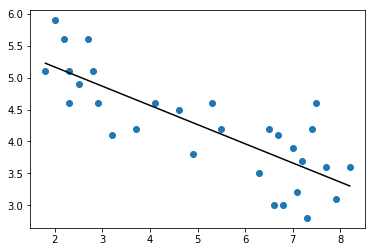

Test loss:0.061697231228246885


In [10]:
TRAIN_PATH = '5-trainingdata.txt'
TEST_PATH = '5-testdata.txt'    
a, b = linear_regression(TRAIN_PATH)
test_loss = test(TEST_PATH, a, b)
print 'Test loss:'+str(test_loss)

Test loss: 0.061697231228246885

# Huber Loss function
https://en.wikipedia.org/wiki/Huber_loss

In [3]:
def Huber(X, y, a, b, sigma):
    N = len(X)
    #residuals
    res = y - a*X - b
    res_abs = np.abs(res)
    idx_l = [res_abs<=sigma]
    idx_g = [res_abs>sigma]
    loss = 0.5*np.sum(res[idx_l]**2) + sigma * np.sum(res_abs[idx_g] - 0.5*sigma)
    loss /= N
    db = 1.0/N * (-np.sum(res[idx_l]) + sigma * (-np.sum(np.sign(res[idx_g]))))
    da = -np.sum(X[idx_l]*res[idx_l]) + sigma *(-np.sum(X[idx_g]))
    da /= N
    return loss, da, db

# Implementation

In [39]:
import numpy as np
import matplotlib.pylab as pl
import random

def Huber(X, y, a, b, sigma):
    N = len(X)
    #residuals
    res = y - a*X - b
    res_abs = np.abs(res)
    idx_l = [res_abs<=sigma]
    idx_g = [res_abs>sigma]
    loss = 0.5*np.sum(res[idx_l]**2) + sigma * np.sum(res_abs[idx_g] - 0.5*sigma)
    loss /= N
    db = 1.0/N * (-np.sum(res[idx_l]) + sigma * (-np.sum(np.sign(res[idx_g]))))
    da = -np.sum(X[idx_l]*res[idx_l]) + sigma *(-np.sum(X[idx_g]*np.sign(res[idx_g])))
    da /= N
    return loss, da, db

def opt(X, y, a, b, learning_rate, num_iter, sigma, browse = True):
#     a_update, b_update = 0.0, 0.0
    for i in range(num_iter):
        loss, da, db = Huber(X, y, a, b, sigma)
        #update a, b
        a -= learning_rate * da
        b -= learning_rate * db
        if browse:
            print 'iter {0}:loss={1}'.format(i,loss)
    return loss, a, b
def test(TEST_PATH, a, b, sigma):
    X_test, y_test = load_data(TEST_PATH)
    loss, _, _ = Huber(X_test, y_test, a, b, sigma)
    return loss
def load_data(PATH):
    data =np.loadtxt(PATH, skiprows=1)
    X, y = data[:,0], data[:,1]
    X /=10.0
    y /=100.0
    return X, y

def linear_regression(PATH, sigma):
    #hyperparameter
    learning_rate = 0.001
    a_init = random.random()
    b_init = random.random()
#     sigma = 2.5
    num_iter = 50000
    print a_init, b_init
    #load data
    X, y = load_data(PATH)
    
    #train
    print 'Train start...'
    loss, a, b = opt(X, y, a_init, b_init, learning_rate, num_iter, sigma)
    print 'Result:\n a = {0}\n b = {1}\n loss = {2}\n'.format(a, b, loss)
    
    #plot
    y_p = a*X + b
    pl.plot(X, y, 'o')
    pl.plot(X, y_p, 'k-')
    pl.show()
    return a, b

0.225445100414 0.0438719427946
Train start...
iter 0:loss=1.26661112029
iter 1:loss=1.26114159529
iter 2:loss=1.25567207029
iter 3:loss=1.25020254529
iter 4:loss=1.24473302029
iter 5:loss=1.23926349529
iter 6:loss=1.23379397029
iter 7:loss=1.22832444529
iter 8:loss=1.22285492029
iter 9:loss=1.21738539529
iter 10:loss=1.21191587029
iter 11:loss=1.20644634529
iter 12:loss=1.20097682029
iter 13:loss=1.19550729529
iter 14:loss=1.19003777029
iter 15:loss=1.18456824529
iter 16:loss=1.17909872029
iter 17:loss=1.17362919529
iter 18:loss=1.16815967029
iter 19:loss=1.16269014529
iter 20:loss=1.15722062029
iter 21:loss=1.15175109529
iter 22:loss=1.14628157029
iter 23:loss=1.14081204529
iter 24:loss=1.13534252029
iter 25:loss=1.12987299529
iter 26:loss=1.12440347029
iter 27:loss=1.11893394529
iter 28:loss=1.11346442029
iter 29:loss=1.10799489529
iter 30:loss=1.10252537029
iter 31:loss=1.09705584529
iter 32:loss=1.09158632029
iter 33:loss=1.08611679529
iter 34:loss=1.08064727029
iter 35:loss=1.0751

iter 773:loss=0.708843428554
iter 774:loss=0.708826080581
iter 775:loss=0.708808732703
iter 776:loss=0.708791384917
iter 777:loss=0.708774037224
iter 778:loss=0.708756689621
iter 779:loss=0.708739342107
iter 780:loss=0.708721994682
iter 781:loss=0.708704647344
iter 782:loss=0.708687300091
iter 783:loss=0.708669952924
iter 784:loss=0.70865260584
iter 785:loss=0.708635258839
iter 786:loss=0.708617911919
iter 787:loss=0.70860056508
iter 788:loss=0.70858321832
iter 789:loss=0.708565871638
iter 790:loss=0.708548525034
iter 791:loss=0.708531178507
iter 792:loss=0.708513832055
iter 793:loss=0.708496485678
iter 794:loss=0.708479139374
iter 795:loss=0.708461793144
iter 796:loss=0.708444446985
iter 797:loss=0.708427100898
iter 798:loss=0.708409754881
iter 799:loss=0.708392408933
iter 800:loss=0.708375063054
iter 801:loss=0.708357717243
iter 802:loss=0.708340371499
iter 803:loss=0.708323025821
iter 804:loss=0.708305680209
iter 805:loss=0.708288334661
iter 806:loss=0.708270989178
iter 807:loss=0.7

iter 2758:loss=0.674469312331
iter 2759:loss=0.674452023188
iter 2760:loss=0.674434734073
iter 2761:loss=0.674417444986
iter 2762:loss=0.674400155927
iter 2763:loss=0.674382866895
iter 2764:loss=0.674365577892
iter 2765:loss=0.674348288916
iter 2766:loss=0.674330999968
iter 2767:loss=0.674313711048
iter 2768:loss=0.674296422156
iter 2769:loss=0.674279133292
iter 2770:loss=0.674261844455
iter 2771:loss=0.674244555647
iter 2772:loss=0.674227266866
iter 2773:loss=0.674209978113
iter 2774:loss=0.674192689388
iter 2775:loss=0.674175400691
iter 2776:loss=0.674158112022
iter 2777:loss=0.674140823381
iter 2778:loss=0.674123534767
iter 2779:loss=0.674106246182
iter 2780:loss=0.674088957624
iter 2781:loss=0.674071669094
iter 2782:loss=0.674054380592
iter 2783:loss=0.674037092118
iter 2784:loss=0.674019803672
iter 2785:loss=0.674002515253
iter 2786:loss=0.673985226863
iter 2787:loss=0.6739679385
iter 2788:loss=0.673950650166
iter 2789:loss=0.673933361859
iter 2790:loss=0.67391607358
iter 2791:los

iter 4783:loss=0.63951584769
iter 4784:loss=0.63949861489
iter 4785:loss=0.639481382117
iter 4786:loss=0.639464149373
iter 4787:loss=0.639446916656
iter 4788:loss=0.639429683967
iter 4789:loss=0.639412451305
iter 4790:loss=0.639395218672
iter 4791:loss=0.639377986066
iter 4792:loss=0.639360753488
iter 4793:loss=0.639343520938
iter 4794:loss=0.639326288415
iter 4795:loss=0.63930905592
iter 4796:loss=0.639291823453
iter 4797:loss=0.639274591014
iter 4798:loss=0.639257358603
iter 4799:loss=0.639240126219
iter 4800:loss=0.639222893863
iter 4801:loss=0.639205661535
iter 4802:loss=0.639188429235
iter 4803:loss=0.639171196963
iter 4804:loss=0.639153964718
iter 4805:loss=0.639136732501
iter 4806:loss=0.639119500312
iter 4807:loss=0.63910226815
iter 4808:loss=0.639085036017
iter 4809:loss=0.639067803911
iter 4810:loss=0.639050571833
iter 4811:loss=0.639033339783
iter 4812:loss=0.63901610776
iter 4813:loss=0.638998875766
iter 4814:loss=0.638981643799
iter 4815:loss=0.638964411859
iter 4816:loss=

iter 6817:loss=0.604521702289
iter 6818:loss=0.604504525897
iter 6819:loss=0.604487349533
iter 6820:loss=0.604470173196
iter 6821:loss=0.604452996887
iter 6822:loss=0.604435820606
iter 6823:loss=0.604418644353
iter 6824:loss=0.604401468127
iter 6825:loss=0.604384291929
iter 6826:loss=0.604367115758
iter 6827:loss=0.604349939615
iter 6828:loss=0.6043327635
iter 6829:loss=0.604315587413
iter 6830:loss=0.604298411353
iter 6831:loss=0.604281235321
iter 6832:loss=0.604264059316
iter 6833:loss=0.60424688334
iter 6834:loss=0.604229707391
iter 6835:loss=0.604212531469
iter 6836:loss=0.604195355576
iter 6837:loss=0.60417817971
iter 6838:loss=0.604161003871
iter 6839:loss=0.604143828061
iter 6840:loss=0.604126652278
iter 6841:loss=0.604109476523
iter 6842:loss=0.604092300795
iter 6843:loss=0.604075125095
iter 6844:loss=0.604057949423
iter 6845:loss=0.604040773779
iter 6846:loss=0.604023598162
iter 6847:loss=0.604006422573
iter 6848:loss=0.603989247011
iter 6849:loss=0.603972071478
iter 6850:loss

iter 8845:loss=0.569744825082
iter 8846:loss=0.569727704748
iter 8847:loss=0.569710584441
iter 8848:loss=0.569693464163
iter 8849:loss=0.569676343911
iter 8850:loss=0.569659223688
iter 8851:loss=0.569642103492
iter 8852:loss=0.569624983323
iter 8853:loss=0.569607863183
iter 8854:loss=0.569590743069
iter 8855:loss=0.569573622984
iter 8856:loss=0.569556502926
iter 8857:loss=0.569539382895
iter 8858:loss=0.569522262893
iter 8859:loss=0.569505142917
iter 8860:loss=0.56948802297
iter 8861:loss=0.56947090305
iter 8862:loss=0.569453783157
iter 8863:loss=0.569436663292
iter 8864:loss=0.569419543455
iter 8865:loss=0.569402423646
iter 8866:loss=0.569385303863
iter 8867:loss=0.569368184109
iter 8868:loss=0.569351064382
iter 8869:loss=0.569333944683
iter 8870:loss=0.569316825011
iter 8871:loss=0.569299705367
iter 8872:loss=0.569282585751
iter 8873:loss=0.569265466162
iter 8874:loss=0.569248346601
iter 8875:loss=0.569231227067
iter 8876:loss=0.569214107561
iter 8877:loss=0.569196988082
iter 8878:lo

iter 10861:loss=0.535286474471
iter 10862:loss=0.535269410538
iter 10863:loss=0.535252346634
iter 10864:loss=0.535235282759
iter 10865:loss=0.535218218913
iter 10866:loss=0.535201155096
iter 10867:loss=0.535184091308
iter 10868:loss=0.535167027549
iter 10869:loss=0.535149963819
iter 10870:loss=0.535132900118
iter 10871:loss=0.535115836445
iter 10872:loss=0.535098772802
iter 10873:loss=0.535081709188
iter 10874:loss=0.535064645603
iter 10875:loss=0.535047582046
iter 10876:loss=0.535030518519
iter 10877:loss=0.53501345502
iter 10878:loss=0.534996391551
iter 10879:loss=0.53497932811
iter 10880:loss=0.534962264699
iter 10881:loss=0.534945201316
iter 10882:loss=0.534928137962
iter 10883:loss=0.534911074638
iter 10884:loss=0.534894011342
iter 10885:loss=0.534876948075
iter 10886:loss=0.534859884837
iter 10887:loss=0.534842821628
iter 10888:loss=0.534825758448
iter 10889:loss=0.534808695297
iter 10890:loss=0.534791632175
iter 10891:loss=0.534774569082
iter 10892:loss=0.534757506018
iter 10893

iter 12870:loss=0.501090786744
iter 12871:loss=0.50107385157
iter 12872:loss=0.501056916516
iter 12873:loss=0.501039981581
iter 12874:loss=0.501023046766
iter 12875:loss=0.50100611207
iter 12876:loss=0.500989177494
iter 12877:loss=0.500972243038
iter 12878:loss=0.500955308701
iter 12879:loss=0.500938374484
iter 12880:loss=0.500921440387
iter 12881:loss=0.500904506409
iter 12882:loss=0.500887572551
iter 12883:loss=0.500870638813
iter 12884:loss=0.500853705194
iter 12885:loss=0.500836771695
iter 12886:loss=0.500819838315
iter 12887:loss=0.500802905055
iter 12888:loss=0.500785971915
iter 12889:loss=0.500769038894
iter 12890:loss=0.500752105993
iter 12891:loss=0.500735173212
iter 12892:loss=0.50071824055
iter 12893:loss=0.500701308007
iter 12894:loss=0.500684375585
iter 12895:loss=0.500667443282
iter 12896:loss=0.500650511099
iter 12897:loss=0.500633579035
iter 12898:loss=0.500616647091
iter 12899:loss=0.500599715266
iter 12900:loss=0.500582783561
iter 12901:loss=0.500565851976
iter 12902:

iter 14867:loss=0.467508568599
iter 14868:loss=0.467491870667
iter 14869:loss=0.467475172853
iter 14870:loss=0.467458475157
iter 14871:loss=0.467441777579
iter 14872:loss=0.467425080118
iter 14873:loss=0.467408382776
iter 14874:loss=0.467391685552
iter 14875:loss=0.467374988445
iter 14876:loss=0.467358291457
iter 14877:loss=0.467341594586
iter 14878:loss=0.467324897834
iter 14879:loss=0.467308201199
iter 14880:loss=0.467291504683
iter 14881:loss=0.467274808284
iter 14882:loss=0.467258112003
iter 14883:loss=0.467241415841
iter 14884:loss=0.467224719796
iter 14885:loss=0.467208023869
iter 14886:loss=0.46719132806
iter 14887:loss=0.467174632369
iter 14888:loss=0.467157936796
iter 14889:loss=0.467141241341
iter 14890:loss=0.467124546004
iter 14891:loss=0.467107850785
iter 14892:loss=0.467091155684
iter 14893:loss=0.4670744607
iter 14894:loss=0.467057765835
iter 14895:loss=0.467041071088
iter 14896:loss=0.467024376458
iter 14897:loss=0.467007681947
iter 14898:loss=0.466990987553
iter 14899:

iter 16843:loss=0.434742569216
iter 16844:loss=0.43472610276
iter 16845:loss=0.43470963642
iter 16846:loss=0.434693170196
iter 16847:loss=0.434676704089
iter 16848:loss=0.434660238098
iter 16849:loss=0.434643772224
iter 16850:loss=0.434627306465
iter 16851:loss=0.434610840823
iter 16852:loss=0.434594375297
iter 16853:loss=0.434577909888
iter 16854:loss=0.434561444595
iter 16855:loss=0.434544979418
iter 16856:loss=0.434528514358
iter 16857:loss=0.434512049414
iter 16858:loss=0.434495584586
iter 16859:loss=0.434479119875
iter 16860:loss=0.434462655279
iter 16861:loss=0.434446190801
iter 16862:loss=0.434429726438
iter 16863:loss=0.434413262192
iter 16864:loss=0.434396798062
iter 16865:loss=0.434380334048
iter 16866:loss=0.434363870151
iter 16867:loss=0.43434740637
iter 16868:loss=0.434330942705
iter 16869:loss=0.434314479157
iter 16870:loss=0.434298015725
iter 16871:loss=0.434281552409
iter 16872:loss=0.43426508921
iter 16873:loss=0.434248626127
iter 16874:loss=0.43423216316
iter 16875:lo

iter 18859:loss=0.4017813518
iter 18860:loss=0.401765118198
iter 18861:loss=0.401748884711
iter 18862:loss=0.401732651339
iter 18863:loss=0.401716418082
iter 18864:loss=0.401700184939
iter 18865:loss=0.401683951911
iter 18866:loss=0.401667718998
iter 18867:loss=0.4016514862
iter 18868:loss=0.401635253516
iter 18869:loss=0.401619020946
iter 18870:loss=0.401602788492
iter 18871:loss=0.401586556152
iter 18872:loss=0.401570323927
iter 18873:loss=0.401554091816
iter 18874:loss=0.40153785982
iter 18875:loss=0.401521627939
iter 18876:loss=0.401505396172
iter 18877:loss=0.40148916452
iter 18878:loss=0.401472932983
iter 18879:loss=0.401456701561
iter 18880:loss=0.401440470253
iter 18881:loss=0.40142423906
iter 18882:loss=0.401408007981
iter 18883:loss=0.401391777017
iter 18884:loss=0.401375546168
iter 18885:loss=0.401359315433
iter 18886:loss=0.401343084814
iter 18887:loss=0.401326854308
iter 18888:loss=0.401310623918
iter 18889:loss=0.401294393642
iter 18890:loss=0.401278163481
iter 18891:loss

iter 20867:loss=0.369399459084
iter 20868:loss=0.369383448622
iter 20869:loss=0.369367438287
iter 20870:loss=0.36935142808
iter 20871:loss=0.369335418001
iter 20872:loss=0.369319408049
iter 20873:loss=0.369303398226
iter 20874:loss=0.36928738853
iter 20875:loss=0.369271378963
iter 20876:loss=0.369255369523
iter 20877:loss=0.369239360211
iter 20878:loss=0.369223351026
iter 20879:loss=0.36920734197
iter 20880:loss=0.369191333041
iter 20881:loss=0.36917532424
iter 20882:loss=0.369159315567
iter 20883:loss=0.369143307022
iter 20884:loss=0.369127298605
iter 20885:loss=0.369111290316
iter 20886:loss=0.369095282154
iter 20887:loss=0.36907927412
iter 20888:loss=0.369063266214
iter 20889:loss=0.369047258436
iter 20890:loss=0.369031250785
iter 20891:loss=0.369015243263
iter 20892:loss=0.368999235868
iter 20893:loss=0.368983228601
iter 20894:loss=0.368967221462
iter 20895:loss=0.368951214451
iter 20896:loss=0.368935207567
iter 20897:loss=0.368919200812
iter 20898:loss=0.368903194184
iter 20899:lo

iter 22860:loss=0.33774303458
iter 22861:loss=0.337727276888
iter 22862:loss=0.337711519321
iter 22863:loss=0.337695761881
iter 22864:loss=0.337680004566
iter 22865:loss=0.337664247378
iter 22866:loss=0.337648490315
iter 22867:loss=0.337632733377
iter 22868:loss=0.337616976566
iter 22869:loss=0.33760121988
iter 22870:loss=0.337585463321
iter 22871:loss=0.337569706887
iter 22872:loss=0.337553950579
iter 22873:loss=0.337538194396
iter 22874:loss=0.33752243834
iter 22875:loss=0.337506682409
iter 22876:loss=0.337490926604
iter 22877:loss=0.337475170925
iter 22878:loss=0.337459415372
iter 22879:loss=0.337443659945
iter 22880:loss=0.337427904643
iter 22881:loss=0.337412149467
iter 22882:loss=0.337396394417
iter 22883:loss=0.337380639493
iter 22884:loss=0.337364884694
iter 22885:loss=0.337349130022
iter 22886:loss=0.337333375475
iter 22887:loss=0.337317621054
iter 22888:loss=0.337301866759
iter 22889:loss=0.337286112589
iter 22890:loss=0.337270358545
iter 22891:loss=0.337254604628
iter 22892:

iter 24875:loss=0.30624522901
iter 24876:loss=0.306229722822
iter 24877:loss=0.306214216758
iter 24878:loss=0.306198710817
iter 24879:loss=0.306183205001
iter 24880:loss=0.306167699308
iter 24881:loss=0.306152193739
iter 24882:loss=0.306136688293
iter 24883:loss=0.306121182972
iter 24884:loss=0.306105677774
iter 24885:loss=0.306090172701
iter 24886:loss=0.306074667751
iter 24887:loss=0.306059162924
iter 24888:loss=0.306043658222
iter 24889:loss=0.306028153643
iter 24890:loss=0.306012649189
iter 24891:loss=0.305997144858
iter 24892:loss=0.30598164065
iter 24893:loss=0.305966136567
iter 24894:loss=0.305950632607
iter 24895:loss=0.305935128772
iter 24896:loss=0.30591962506
iter 24897:loss=0.305904121471
iter 24898:loss=0.305888618007
iter 24899:loss=0.305873114666
iter 24900:loss=0.305857611449
iter 24901:loss=0.305842108356
iter 24902:loss=0.305826605387
iter 24903:loss=0.305811102542
iter 24904:loss=0.30579559982
iter 24905:loss=0.305780097222
iter 24906:loss=0.305764594748
iter 24907:l

iter 26870:loss=0.27578733845
iter 26871:loss=0.275772475218
iter 26872:loss=0.275757612562
iter 26873:loss=0.27574275048
iter 26874:loss=0.275727888974
iter 26875:loss=0.275713028043
iter 26876:loss=0.275698167688
iter 26877:loss=0.275683307907
iter 26878:loss=0.275668448701
iter 26879:loss=0.275653590071
iter 26880:loss=0.275638732015
iter 26881:loss=0.275623874535
iter 26882:loss=0.275609017629
iter 26883:loss=0.275594161298
iter 26884:loss=0.275579305543
iter 26885:loss=0.275564450362
iter 26886:loss=0.275549595756
iter 26887:loss=0.275534741725
iter 26888:loss=0.275519888268
iter 26889:loss=0.275505035387
iter 26890:loss=0.27549018308
iter 26891:loss=0.275475331349
iter 26892:loss=0.275460480191
iter 26893:loss=0.275445629609
iter 26894:loss=0.275430779601
iter 26895:loss=0.275415930168
iter 26896:loss=0.27540108131
iter 26897:loss=0.275386233026
iter 26898:loss=0.275371385317
iter 26899:loss=0.275356538183
iter 26900:loss=0.275341691623
iter 26901:loss=0.275326845637
iter 26902:l

iter 28879:loss=0.247171527627
iter 28880:loss=0.247157897021
iter 28881:loss=0.247144267009
iter 28882:loss=0.24713063759
iter 28883:loss=0.247117008764
iter 28884:loss=0.247103380531
iter 28885:loss=0.24708975289
iter 28886:loss=0.247076125843
iter 28887:loss=0.247062499388
iter 28888:loss=0.247048873526
iter 28889:loss=0.247035248257
iter 28890:loss=0.247021623581
iter 28891:loss=0.247007999498
iter 28892:loss=0.246994376007
iter 28893:loss=0.246980753109
iter 28894:loss=0.246967130803
iter 28895:loss=0.24695350909
iter 28896:loss=0.24693988797
iter 28897:loss=0.246926267442
iter 28898:loss=0.246912647507
iter 28899:loss=0.246899028165
iter 28900:loss=0.246885409415
iter 28901:loss=0.246871791257
iter 28902:loss=0.246858173692
iter 28903:loss=0.246844556719
iter 28904:loss=0.246830940339
iter 28905:loss=0.246817324551
iter 28906:loss=0.246803709356
iter 28907:loss=0.246790094753
iter 28908:loss=0.246776480742
iter 28909:loss=0.246762867323
iter 28910:loss=0.246749254497
iter 28911:l

iter 30858:loss=0.221324623221
iter 30859:loss=0.221312117084
iter 30860:loss=0.221299611491
iter 30861:loss=0.221287106441
iter 30862:loss=0.221274601936
iter 30863:loss=0.221262097975
iter 30864:loss=0.221249594558
iter 30865:loss=0.221237091685
iter 30866:loss=0.221224589356
iter 30867:loss=0.221212087571
iter 30868:loss=0.221199586329
iter 30869:loss=0.221187085632
iter 30870:loss=0.221174585478
iter 30871:loss=0.221162085868
iter 30872:loss=0.221149586802
iter 30873:loss=0.22113708828
iter 30874:loss=0.221124590301
iter 30875:loss=0.221112092867
iter 30876:loss=0.221099595976
iter 30877:loss=0.221087099628
iter 30878:loss=0.221074603824
iter 30879:loss=0.221062108564
iter 30880:loss=0.221049613848
iter 30881:loss=0.221037119675
iter 30882:loss=0.221024626045
iter 30883:loss=0.221012132959
iter 30884:loss=0.220999640417
iter 30885:loss=0.220987148418
iter 30886:loss=0.220974656963
iter 30887:loss=0.220962166051
iter 30888:loss=0.220949675682
iter 30889:loss=0.220937185857
iter 3089

iter 32877:loss=0.197149944062
iter 32878:loss=0.197138487764
iter 32879:loss=0.197127031964
iter 32880:loss=0.19711557666
iter 32881:loss=0.197104121854
iter 32882:loss=0.197092667545
iter 32883:loss=0.197081213734
iter 32884:loss=0.197069760419
iter 32885:loss=0.197058307601
iter 32886:loss=0.197046855281
iter 32887:loss=0.197035403457
iter 32888:loss=0.197023952131
iter 32889:loss=0.197012501302
iter 32890:loss=0.197001050969
iter 32891:loss=0.196989601134
iter 32892:loss=0.196978151796
iter 32893:loss=0.196966702954
iter 32894:loss=0.19695525461
iter 32895:loss=0.196943806762
iter 32896:loss=0.196932359411
iter 32897:loss=0.196920912558
iter 32898:loss=0.196909466201
iter 32899:loss=0.19689802034
iter 32900:loss=0.196886574977
iter 32901:loss=0.19687513011
iter 32902:loss=0.19686368574
iter 32903:loss=0.196852241867
iter 32904:loss=0.19684079849
iter 32905:loss=0.196829355611
iter 32906:loss=0.196817913227
iter 32907:loss=0.196806471341
iter 32908:loss=0.196795029951
iter 32909:los

iter 34767:loss=0.176688903232
iter 34768:loss=0.17667891299
iter 34769:loss=0.176668923689
iter 34770:loss=0.176658935331
iter 34771:loss=0.176648947913
iter 34772:loss=0.176638961437
iter 34773:loss=0.176628975902
iter 34774:loss=0.176618991308
iter 34775:loss=0.176609007655
iter 34776:loss=0.176599024942
iter 34777:loss=0.176589043171
iter 34778:loss=0.17657906234
iter 34779:loss=0.17656908245
iter 34780:loss=0.176559103501
iter 34781:loss=0.176549125492
iter 34782:loss=0.176539148423
iter 34783:loss=0.176529172295
iter 34784:loss=0.176519197106
iter 34785:loss=0.176509222858
iter 34786:loss=0.17649924955
iter 34787:loss=0.176489277182
iter 34788:loss=0.176479305753
iter 34789:loss=0.176469335265
iter 34790:loss=0.176459365716
iter 34791:loss=0.176449397106
iter 34792:loss=0.176439429436
iter 34793:loss=0.176429462706
iter 34794:loss=0.176419496914
iter 34795:loss=0.176409532062
iter 34796:loss=0.176399568149
iter 34797:loss=0.176389605176
iter 34798:loss=0.176379643141
iter 34799:l

iter 36525:loss=0.160511335993
iter 36526:loss=0.160502902318
iter 36527:loss=0.160494469497
iter 36528:loss=0.160486037532
iter 36529:loss=0.160477606421
iter 36530:loss=0.160469176164
iter 36531:loss=0.160460746762
iter 36532:loss=0.160452318215
iter 36533:loss=0.160443890521
iter 36534:loss=0.160435463682
iter 36535:loss=0.160427037697
iter 36536:loss=0.160418612566
iter 36537:loss=0.160410188289
iter 36538:loss=0.160401764865
iter 36539:loss=0.160393342296
iter 36540:loss=0.16038492058
iter 36541:loss=0.160376499717
iter 36542:loss=0.160368079708
iter 36543:loss=0.160359660553
iter 36544:loss=0.16035124225
iter 36545:loss=0.160342824801
iter 36546:loss=0.160334408206
iter 36547:loss=0.160325992463
iter 36548:loss=0.160317577573
iter 36549:loss=0.160309163536
iter 36550:loss=0.160300750352
iter 36551:loss=0.16029233802
iter 36552:loss=0.160283926541
iter 36553:loss=0.160275515915
iter 36554:loss=0.160267106141
iter 36555:loss=0.16025869722
iter 36556:loss=0.16025028915
iter 36557:lo

iter 38095:loss=0.148269644528
iter 38096:loss=0.148262451589
iter 38097:loss=0.148255259379
iter 38098:loss=0.148248067898
iter 38099:loss=0.148240877146
iter 38100:loss=0.148233687122
iter 38101:loss=0.148226497827
iter 38102:loss=0.148219309261
iter 38103:loss=0.148212121424
iter 38104:loss=0.148204934315
iter 38105:loss=0.148197747934
iter 38106:loss=0.148190562282
iter 38107:loss=0.148183377358
iter 38108:loss=0.148176193162
iter 38109:loss=0.148169009695
iter 38110:loss=0.148161826956
iter 38111:loss=0.148154644945
iter 38112:loss=0.148147463663
iter 38113:loss=0.14814028311
iter 38114:loss=0.148133103285
iter 38115:loss=0.148125924188
iter 38116:loss=0.14811874582
iter 38117:loss=0.148111568179
iter 38118:loss=0.148104391267
iter 38119:loss=0.148097215083
iter 38120:loss=0.148090039627
iter 38121:loss=0.148082864899
iter 38122:loss=0.148075690898
iter 38123:loss=0.148068517625
iter 38124:loss=0.14806134508
iter 38125:loss=0.148054173262
iter 38126:loss=0.148047002172
iter 38127:

iter 39761:loss=0.137268724032
iter 39762:loss=0.137262730985
iter 39763:loss=0.13725673868
iter 39764:loss=0.137250747116
iter 39765:loss=0.137244756293
iter 39766:loss=0.137238766212
iter 39767:loss=0.137232776872
iter 39768:loss=0.137226788273
iter 39769:loss=0.137220800414
iter 39770:loss=0.137214813297
iter 39771:loss=0.13720882692
iter 39772:loss=0.137202841284
iter 39773:loss=0.137196856388
iter 39774:loss=0.137190872233
iter 39775:loss=0.137184888818
iter 39776:loss=0.137178906144
iter 39777:loss=0.13717292421
iter 39778:loss=0.137166943016
iter 39779:loss=0.137160962561
iter 39780:loss=0.137154982847
iter 39781:loss=0.137149003873
iter 39782:loss=0.137143025638
iter 39783:loss=0.137137048143
iter 39784:loss=0.137131071388
iter 39785:loss=0.137125095372
iter 39786:loss=0.137119120095
iter 39787:loss=0.137113145558
iter 39788:loss=0.13710717176
iter 39789:loss=0.137101198701
iter 39790:loss=0.13709522638
iter 39791:loss=0.137089254799
iter 39792:loss=0.137083283957
iter 39793:lo

iter 41583:loss=0.127502265988
iter 41584:loss=0.127497537365
iter 41585:loss=0.127492809477
iter 41586:loss=0.127488082323
iter 41587:loss=0.127483355902
iter 41588:loss=0.127478630215
iter 41589:loss=0.127473905262
iter 41590:loss=0.127469181042
iter 41591:loss=0.127464457556
iter 41592:loss=0.127459734803
iter 41593:loss=0.127455012783
iter 41594:loss=0.127450291496
iter 41595:loss=0.127445570942
iter 41596:loss=0.127440851121
iter 41597:loss=0.127436132033
iter 41598:loss=0.127431413677
iter 41599:loss=0.127426696053
iter 41600:loss=0.127421979162
iter 41601:loss=0.127417263004
iter 41602:loss=0.127412547577
iter 41603:loss=0.127407832882
iter 41604:loss=0.12740311892
iter 41605:loss=0.127398405689
iter 41606:loss=0.12739369319
iter 41607:loss=0.127388981422
iter 41608:loss=0.127384270386
iter 41609:loss=0.127379560081
iter 41610:loss=0.127374850507
iter 41611:loss=0.127370141665
iter 41612:loss=0.127365433553
iter 41613:loss=0.127360726172
iter 41614:loss=0.127356019522
iter 41615

iter 43251:loss=0.120541577639
iter 43252:loss=0.120537910166
iter 43253:loss=0.120534243331
iter 43254:loss=0.120530577134
iter 43255:loss=0.120526911574
iter 43256:loss=0.120523246652
iter 43257:loss=0.120519582367
iter 43258:loss=0.12051591872
iter 43259:loss=0.120512255709
iter 43260:loss=0.120508593335
iter 43261:loss=0.120504931598
iter 43262:loss=0.120501270498
iter 43263:loss=0.120497610035
iter 43264:loss=0.120493950207
iter 43265:loss=0.120490291016
iter 43266:loss=0.120486632462
iter 43267:loss=0.120482974543
iter 43268:loss=0.12047931726
iter 43269:loss=0.120475660613
iter 43270:loss=0.120472004602
iter 43271:loss=0.120468349227
iter 43272:loss=0.120464694486
iter 43273:loss=0.120461040382
iter 43274:loss=0.120457386912
iter 43275:loss=0.120453734077
iter 43276:loss=0.120450081878
iter 43277:loss=0.120446430313
iter 43278:loss=0.120442779383
iter 43279:loss=0.120439129088
iter 43280:loss=0.120435479427
iter 43281:loss=0.120431830401
iter 43282:loss=0.120428182008
iter 43283

iter 45067:loss=0.114829519902
iter 45068:loss=0.114826844976
iter 45069:loss=0.114824170514
iter 45070:loss=0.114821496518
iter 45071:loss=0.114818822986
iter 45072:loss=0.114816149918
iter 45073:loss=0.114813477315
iter 45074:loss=0.114810805177
iter 45075:loss=0.114808133502
iter 45076:loss=0.114805462292
iter 45077:loss=0.114802791546
iter 45078:loss=0.114800121264
iter 45079:loss=0.114797451447
iter 45080:loss=0.114794782093
iter 45081:loss=0.114792113203
iter 45082:loss=0.114789444776
iter 45083:loss=0.114786776813
iter 45084:loss=0.114784109314
iter 45085:loss=0.114781442279
iter 45086:loss=0.114778775707
iter 45087:loss=0.114776109598
iter 45088:loss=0.114773443952
iter 45089:loss=0.11477077877
iter 45090:loss=0.11476811405
iter 45091:loss=0.114765449794
iter 45092:loss=0.114762786001
iter 45093:loss=0.11476012267
iter 45094:loss=0.114757459803
iter 45095:loss=0.114754797398
iter 45096:loss=0.114752135455
iter 45097:loss=0.114749473976
iter 45098:loss=0.114746812958
iter 45099:

iter 46757:loss=0.110902556598
iter 46758:loss=0.110900544183
iter 46759:loss=0.110898532127
iter 46760:loss=0.11089652043
iter 46761:loss=0.11089450909
iter 46762:loss=0.110892498109
iter 46763:loss=0.110890487485
iter 46764:loss=0.11088847722
iter 46765:loss=0.110886467313
iter 46766:loss=0.110884457763
iter 46767:loss=0.110882448572
iter 46768:loss=0.110880439738
iter 46769:loss=0.110878431262
iter 46770:loss=0.110876423143
iter 46771:loss=0.110874415382
iter 46772:loss=0.110872407979
iter 46773:loss=0.110870400933
iter 46774:loss=0.110868394244
iter 46775:loss=0.110866387913
iter 46776:loss=0.110864381939
iter 46777:loss=0.110862376322
iter 46778:loss=0.110860371063
iter 46779:loss=0.11085836616
iter 46780:loss=0.110856361614
iter 46781:loss=0.110854357426
iter 46782:loss=0.110852353594
iter 46783:loss=0.110850350119
iter 46784:loss=0.110848347001
iter 46785:loss=0.110846344239
iter 46786:loss=0.110844341834
iter 46787:loss=0.110842339786
iter 46788:loss=0.110840338094
iter 46789:l

iter 48359:loss=0.108098381233
iter 48360:loss=0.108096873129
iter 48361:loss=0.108095365306
iter 48362:loss=0.108093857766
iter 48363:loss=0.108092350507
iter 48364:loss=0.108090843529
iter 48365:loss=0.108089336834
iter 48366:loss=0.10808783042
iter 48367:loss=0.108086324287
iter 48368:loss=0.108084818437
iter 48369:loss=0.108083312867
iter 48370:loss=0.108081807579
iter 48371:loss=0.108080302572
iter 48372:loss=0.108078797846
iter 48373:loss=0.108077293402
iter 48374:loss=0.108075789239
iter 48375:loss=0.108074285357
iter 48376:loss=0.108072781756
iter 48377:loss=0.108071278436
iter 48378:loss=0.108069775397
iter 48379:loss=0.108068272639
iter 48380:loss=0.108066770162
iter 48381:loss=0.108065267965
iter 48382:loss=0.108063766049
iter 48383:loss=0.108062264414
iter 48384:loss=0.10806076306
iter 48385:loss=0.108059261986
iter 48386:loss=0.108057761193
iter 48387:loss=0.10805626068
iter 48388:loss=0.108054760448
iter 48389:loss=0.108053260496
iter 48390:loss=0.108051760824
iter 48391:

iter 49399:loss=0.106672843474
iter 49400:loss=0.10667160179
iter 49401:loss=0.106670360338
iter 49402:loss=0.106669119118
iter 49403:loss=0.10666787813
iter 49404:loss=0.106666637374
iter 49405:loss=0.106665396849
iter 49406:loss=0.106664156557
iter 49407:loss=0.106662916496
iter 49408:loss=0.106661676667
iter 49409:loss=0.10666043707
iter 49410:loss=0.106659197704
iter 49411:loss=0.10665795857
iter 49412:loss=0.106656719668
iter 49413:loss=0.106655480997
iter 49414:loss=0.106654242558
iter 49415:loss=0.10665300435
iter 49416:loss=0.106651766374
iter 49417:loss=0.106650528629
iter 49418:loss=0.106649291115
iter 49419:loss=0.106648053832
iter 49420:loss=0.106646816781
iter 49421:loss=0.106645579961
iter 49422:loss=0.106644343372
iter 49423:loss=0.106643107014
iter 49424:loss=0.106641870888
iter 49425:loss=0.106640634992
iter 49426:loss=0.106639399327
iter 49427:loss=0.106638163893
iter 49428:loss=0.10663692869
iter 49429:loss=0.106635693718
iter 49430:loss=0.106634458977
iter 49431:los

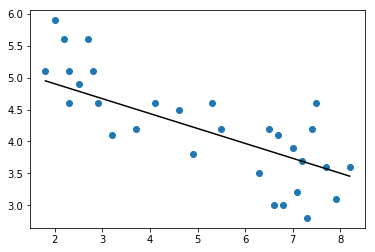

Test loss:0.061440530365872305


In [43]:
TRAIN_PATH = '5-trainingdata.txt'
TEST_PATH = '5-testdata.txt'
sigma = 0.45
a, b = linear_regression(TRAIN_PATH, sigma)
test_loss = test(TEST_PATH, a, b, sigma)
print 'Test loss:'+str(test_loss)

In [44]:
def loss(X, y, a, b):
    N = len(X)
    loss = 0.5/N * np.sum((y - a*X - b)**2)
    return loss
def test_old(TEST_PATH, a, b):
    X_test, y_test = load_data(TEST_PATH)
    return loss(X_test, y_test, a, b)
test_loss_old = test_old(TEST_PATH, a, b)
print 'a = '+str(a)
print 'b = '+str(b)
print 'old way loss: '+str(test_loss_old)

a = -0.233598240653146
b = 5.370174018724616
old way loss: 0.06346189208729631


# Conclusion

After train with Huber function
1.Using original method calculate loss is 0.06346189208729631.
While, Huber loss is 0.061440530365872305